# Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
application_data=pd.read_csv("application_data.csv")

In [3]:
#Getting insights on the Application Dataset

application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Getting insights on Previous Application Data set

previous_application=pd.read_csv("previous_application.csv")

In [5]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# DATA SOURCING & CLEANING FOR APPLICATION DATA

In [7]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
# List of columns with total NA values

application_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [10]:
application_data.isnull().sum().values

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,     12,    278,   1292,      0,      0,      0,      0,
            0,      0,      0,      0,      0, 202929,      0,      0,
            0,      0,      0,      0,  96391,      2,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0, 173378,    660,  60965, 156061, 179943, 150007, 204488,
       214865, 163891, 154828, 153020, 208642, 182590, 210199, 154350,
       213514, 169682, 156061, 179943, 150007, 204488, 214865, 163891,
       154828, 153020, 208642, 182590, 210199, 154350, 213514, 169682,
       156061, 179943, 150007, 204488, 214865, 163891, 154828, 153020,
       208642, 182590, 210199, 154350, 213514, 169682, 210295, 154297,
       148431, 156341, 145755,   1021,   1021,   1021,   1021,      1,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [11]:
# Finding the columns which have more than 30% of the null values

NA_data=application_data.isnull().sum()
NA_data = NA_data[NA_data.values >(0.30*len(application_data))]
len(NA_data)

50

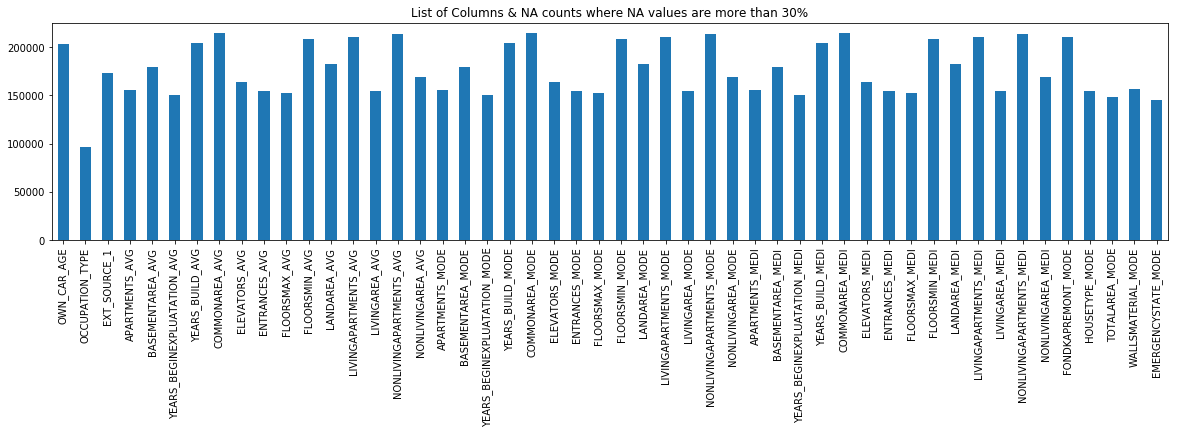

In [12]:
# Bar-chart showing the list of columns having "NA" values more than 30%

plt.figure(figsize=(20,4))
NA_data.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 30%')
plt.show()

### Insight - There are 50 columns which have null values more than 30% in their data

In [13]:
print(application_data["OCCUPATION_TYPE"].describe())
application_data["OCCUPATION_TYPE"].unique()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object


array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [14]:
# OCCUPATION TYPE WHERE NAN IS PRESENT CAN BE PLACED WITH SELF EMPLOYED AS THEY DONT HAVE ANY OCUUPATION

application_data.loc[pd.isnull(application_data["OCCUPATION_TYPE"]),["OCCUPATION_TYPE"]]="Self Employed"

In [15]:
NA_data=application_data.isnull().sum()
NA_data = NA_data[NA_data.values >(0.30*len(application_data))]
len(NA_data)

49

In [16]:
columns_eligible_to_drop=NA_data.index

# DATA CLEANING & MANIPULATION

### Remove the 49 columns as it is not feasable to impute missing values for those columns

In [18]:
application_data_dc=application_data.drop(columns_eligible_to_drop,axis=1).copy()

In [19]:
# All the null values in AMT_REQ_CREDIT_BUREAU* columns can be filled with 0

In [20]:
application_data_dc.loc[pd.isnull(application_data_dc["AMT_REQ_CREDIT_BUREAU_HOUR"]),["AMT_REQ_CREDIT_BUREAU_HOUR"]]=0
application_data_dc.loc[pd.isnull(application_data_dc["AMT_REQ_CREDIT_BUREAU_DAY"]),["AMT_REQ_CREDIT_BUREAU_DAY"]]=0
application_data_dc.loc[pd.isnull(application_data_dc["AMT_REQ_CREDIT_BUREAU_WEEK"]),["AMT_REQ_CREDIT_BUREAU_WEEK"]]=0
application_data_dc.loc[pd.isnull(application_data_dc["AMT_REQ_CREDIT_BUREAU_MON"]),["AMT_REQ_CREDIT_BUREAU_MON"]]=0
application_data_dc.loc[pd.isnull(application_data_dc["AMT_REQ_CREDIT_BUREAU_QRT"]),["AMT_REQ_CREDIT_BUREAU_QRT"]]=0
application_data_dc.loc[pd.isnull(application_data_dc["AMT_REQ_CREDIT_BUREAU_YEAR"]),["AMT_REQ_CREDIT_BUREAU_YEAR"]]=0
application_data_dc.loc[pd.isnull(application_data_dc["OBS_30_CNT_SOCIAL_CIRCLE"]),["OBS_30_CNT_SOCIAL_CIRCLE"]]=0


In [21]:
application_data_dc.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 73, dtype: int64

In [22]:
def check(x):
    
    if x=="XNA":
        return application_data_dc["ORGANIZATION_TYPE"].mode()
    else:
        return x

    

In [23]:
print(round(100 *(application_data_dc.isnull().sum()/len(application_data_dc.index)),2))
series=round(100 *(application_data_dc.isnull().sum()/len(application_data_dc.index)),2)
 

SK_ID_CURR                    0.0
TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 73, dtype: float64


In [24]:
series[series.values>0]

AMT_GOODS_PRICE              0.09
NAME_TYPE_SUITE              0.42
EXT_SOURCE_2                 0.21
EXT_SOURCE_3                19.83
DEF_30_CNT_SOCIAL_CIRCLE     0.33
OBS_60_CNT_SOCIAL_CIRCLE     0.33
DEF_60_CNT_SOCIAL_CIRCLE     0.33
dtype: float64

In [25]:
application_data_dc["AMT_GOODS_PRICE"].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

### Since the percentage of NAN values in "AMT_GOODS_PRICE" is very low it is ideal to remove the rows which have null values

In [26]:
application_data_dc= application_data_dc[~np.isnan(application_data_dc["AMT_GOODS_PRICE"])]
 

In [27]:
print(application_data_dc["NAME_TYPE_SUITE"].describe())
application_data_dc["NAME_TYPE_SUITE"].unique()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object


array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

count    3.065740e+05
mean     5.143934e-01
std      1.910700e-01
min      8.173617e-08
25%      3.924431e-01
50%      5.659722e-01
75%      6.636305e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


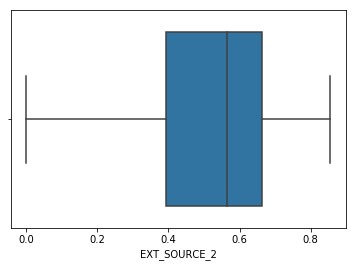

In [28]:
print(application_data_dc["EXT_SOURCE_2"].describe())
sns.boxplot(application_data_dc["EXT_SOURCE_2"])
plt.show()

### Since box plot shows mean is not at the center and also since only 2% of rows have NAN we can remove the rows instead replacing with values

In [29]:
application_data_dc= application_data_dc[~np.isnan(application_data_dc["EXT_SOURCE_2"])]

count    245906.000000
mean          0.510800
std           0.194856
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


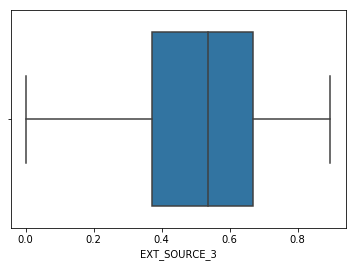

In [30]:
print(application_data_dc["EXT_SOURCE_3"].describe())
sns.boxplot(application_data_dc["EXT_SOURCE_3"])
plt.show()

### Though boxplot shows the mean is almost at the center but 19% of data has NAN values replacing with the values is not ideal. Though the standard deviation seems to be very less, if we observe the mean values and maximum values the data in this column is between 0-1 and replacing it with mean would be a bad idea , so it is ideal to remove the rows with NAN


In [31]:
application_data_dc= application_data_dc[~np.isnan(application_data_dc["EXT_SOURCE_3"])]

In [32]:
print(application_data_dc["OBS_30_CNT_SOCIAL_CIRCLE"].describe())
print(application_data_dc["OBS_30_CNT_SOCIAL_CIRCLE"].unique())

count    245906.000000
mean          1.431295
std           2.420677
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64
[  2.   0.   1.   8.  10.   4.   7.   3.   6.   5.  13.  12.  11.  14.
   9.  22.  16.  17.  20.  15.  25.  19.  18.  21.  24.  23.  28.  29.
  27.  47. 348.  30.  26.]


In [33]:
series=round(100 *(application_data_dc.isnull().sum()/len(application_data_dc.index)),2)
series[series.values>0]

NAME_TYPE_SUITE             0.35
DEF_30_CNT_SOCIAL_CIRCLE    0.30
OBS_60_CNT_SOCIAL_CIRCLE    0.30
DEF_60_CNT_SOCIAL_CIRCLE    0.30
dtype: float64

In [34]:
print(application_data.shape)
print(application_data_dc.shape)
print(len(application_data_dc)/len(application_data))

#This shows 80% of data is retrieved and we can proceed for analysis 

(307511, 122)
(245906, 73)
0.7996657030155019


In [35]:
print(application_data_dc.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

# DATA SOURCING & CLEANING OF PREVIOUS APPLICATION DATA

In [209]:
#Now that we completed cleaning of application_data, we will look into previous_application_data and clean if necessary

print(previous_application.info())
previous_application.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

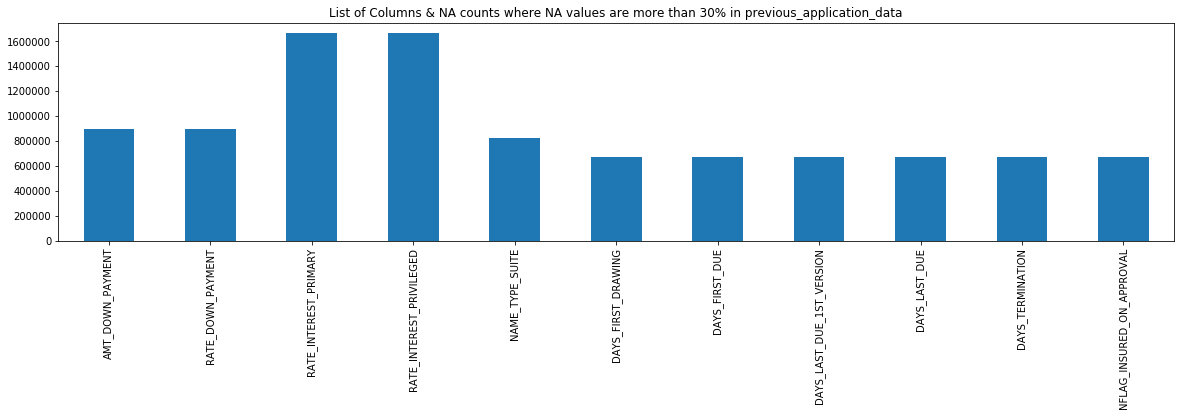

In [211]:
NA_pdata=previous_application.isnull().sum()
NA_pdata = NA_pdata[NA_pdata.values >(0.30*len(previous_application))]
plt.figure(figsize=(20,4))
NA_pdata.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 30% in previous_application_data')
plt.show()

### Insights - We have 11 columns with "NA" values greater than 30%

In [256]:
#Drop the columns which have "NA" values greater than 30%

columns_eligible_to_drop=NA_pdata.index

previous_application_dc=previous_application.drop(columns_eligible_to_drop,axis=1).copy()

In [257]:
print(previous_application.shape)
previous_application_dc.shape

(1670214, 37)


(1670214, 26)

In [258]:
series2=round(100 *(previous_application_dc.isnull().sum()/len(previous_application_dc.index)),2)
series2[series2.values>0]

AMT_ANNUITY            22.29
AMT_GOODS_PRICE        23.08
CNT_PAYMENT            22.29
PRODUCT_COMBINATION     0.02
dtype: float64

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


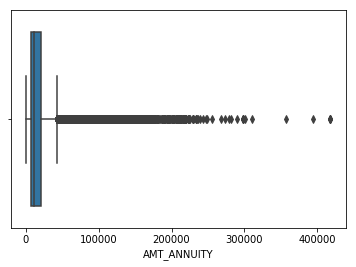

92.64823281638127

In [259]:
print(previous_application_dc["AMT_ANNUITY"].describe())
sns.boxplot(previous_application_dc["AMT_ANNUITY"])
plt.show()
((previous_application_dc["AMT_ANNUITY"].std()/previous_application_dc["AMT_ANNUITY"].mean())*100)
#### since this shows there are so many outliers we can replace NAN values with median

### Since the plot shows there are so many outliers, we can replace NAN values with the median value

In [260]:
# Replacing NA with median as it has many outliers

previous_application_dc["AMT_ANNUITY"].fillna(previous_application_dc["AMT_ANNUITY"].median(), inplace=True)


count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64


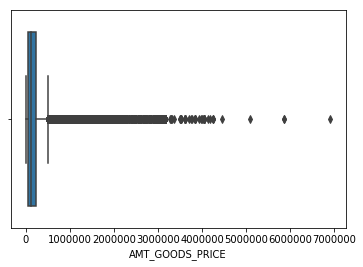

In [261]:
# Replacing NA with median as it has many outliers

print(previous_application_dc["AMT_GOODS_PRICE"].describe())
sns.boxplot(previous_application_dc["AMT_GOODS_PRICE"])
previous_application_dc["AMT_GOODS_PRICE"].fillna(previous_application_dc["AMT_GOODS_PRICE"].median(), inplace=True)


count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64


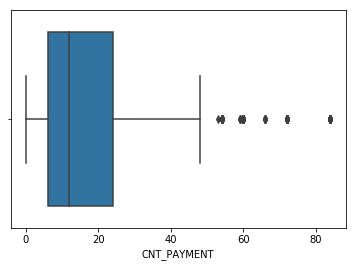

In [262]:
# Replacing with mean as it seems less outliers

print(previous_application_dc["CNT_PAYMENT"].describe())
sns.boxplot(previous_application_dc["CNT_PAYMENT"])
 
previous_application_dc["AMT_GOODS_PRICE"].fillna(previous_application_dc["AMT_GOODS_PRICE"].mean(), inplace=True)


In [263]:
# Filling NA values with mode as this is categorical variable

print(previous_application_dc["PRODUCT_COMBINATION"].describe())

previous_application_dc["PRODUCT_COMBINATION"].mode()
previous_application_dc["PRODUCT_COMBINATION"].fillna(previous_application_dc["PRODUCT_COMBINATION"].mode()[0], inplace=True)

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object


# Data Analyzation

### Our focus is more on target variable as it is the main column which describes whether the applicant is "DEFAULTER" or not. Wee should analyze the target variable and see how the column is populated mainly since this might be used for ML Model (Target Variable should not be biased)

In [48]:
DEFAULTER = 0; NON_DEFAULTER = 0 # initialisation

for i in application_data_dc['TARGET'].values:
    if i == 1:
        DEFAULTER = DEFAULTER+1
    else:
        NON_DEFAULTER = NON_DEFAULTER+1

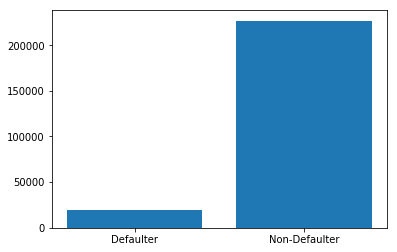

In [49]:
X = ['Defaulter','Non-Defaulter']
Y= [DEFAULTER,NON_DEFAULTER]
plt.bar(X,Y, width = 0.8)
plt.show()

#This shows that most of the clients dont have payment difficulties and the data is biased towards non-defaulter(clients dont
#have payment difficulties)

### Insights - Now you can divide the data into two data frames defaulater data and non defaulter data to identify patterns among them which will serve as insights for us

In [51]:
defaulter_application_data_dc=application_data_dc[application_data_dc["TARGET"]==1]
non_defaulter_application_data_dc=application_data_dc[application_data_dc["TARGET"]==0]

In [52]:
#cross checking if any data is missed

print(DEFAULTER)
print(defaulter_application_data_dc.shape)
print(NON_DEFAULTER)
print(non_defaulter_application_data_dc.shape)

19098
(19098, 73)
226808
(226808, 73)


### Similarly let us look into data from previous_application_dc as we know that bank refuses loan if bank thinks client cannot pay or client is considered as defaulter by bank.

# Univariate analysis for the data

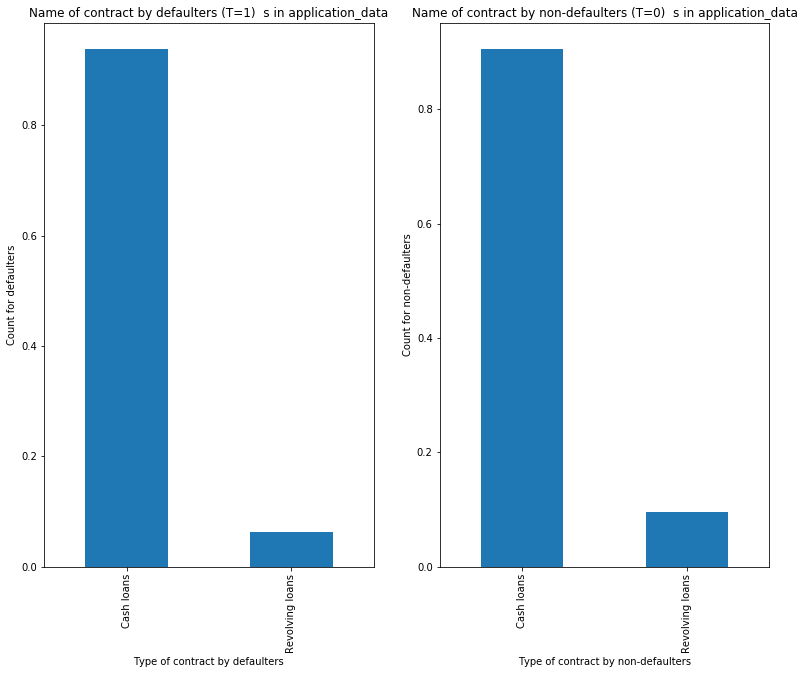

In [55]:
plt.figure(figsize=(13,10))
plt.subplot(121)
plt.title('Name of contract by defaulters (T=1)  s in application_data')
plt.ylabel('Count for defaulters')
plt.xlabel('Type of contract by defaulters')
defaulter_application_data_dc["NAME_CONTRACT_TYPE"].value_counts(normalize=True).plot.bar()
plt.subplot(122)
plt.title('Name of contract by non-defaulters (T=0)  s in application_data')
plt.ylabel('Count for non-defaulters')
plt.xlabel('Type of contract by non-defaulters')
non_defaulter_application_data_dc["NAME_CONTRACT_TYPE"].value_counts(normalize=True).plot.bar()
plt.show()

### Insights - The graph shows the applications of revolving loans are higher for non-defaulters compared to defaulters

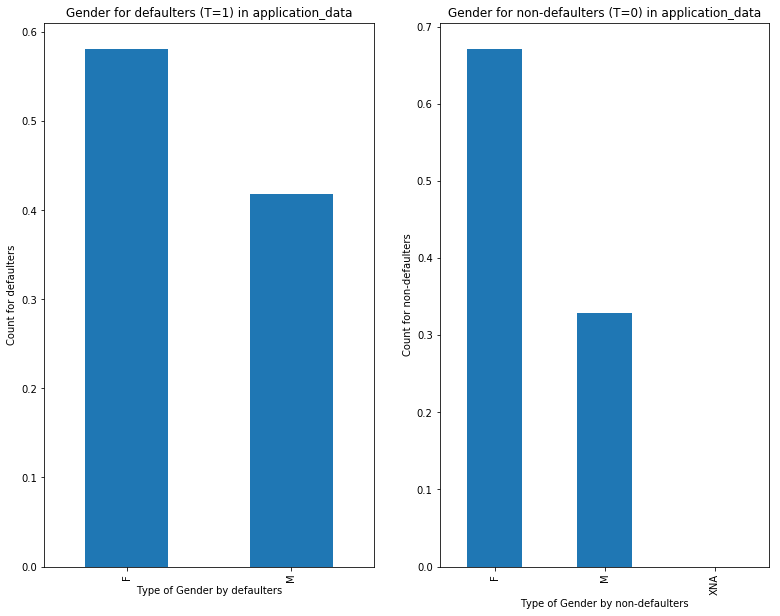

In [56]:
plt.figure(figsize=(13,10))
plt.subplot(121)
plt.title('Gender for defaulters (T=1) in application_data')
plt.ylabel('Count for defaulters')
plt.xlabel('Type of Gender by defaulters')
defaulter_application_data_dc["CODE_GENDER"].value_counts(normalize=True).plot.bar()
plt.subplot(122)
plt.title('Gender for non-defaulters (T=0) in application_data')
plt.ylabel('Count for non-defaulters')
plt.xlabel('Type of Gender by non-defaulters')
non_defaulter_application_data_dc["CODE_GENDER"].value_counts(normalize=True).plot.bar()
plt.show()

#The percentage of male defaulters are high compared to female defaulters


### Insight - The percentage of male defaulters are high compared to female defaulters

In [57]:
non_defaulter_application_data_dc["CODE_GENDER"].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [58]:
non_defaulter_application_data_dc["FLAG_OWN_CAR"].unique()

array(['Y', 'N'], dtype=object)

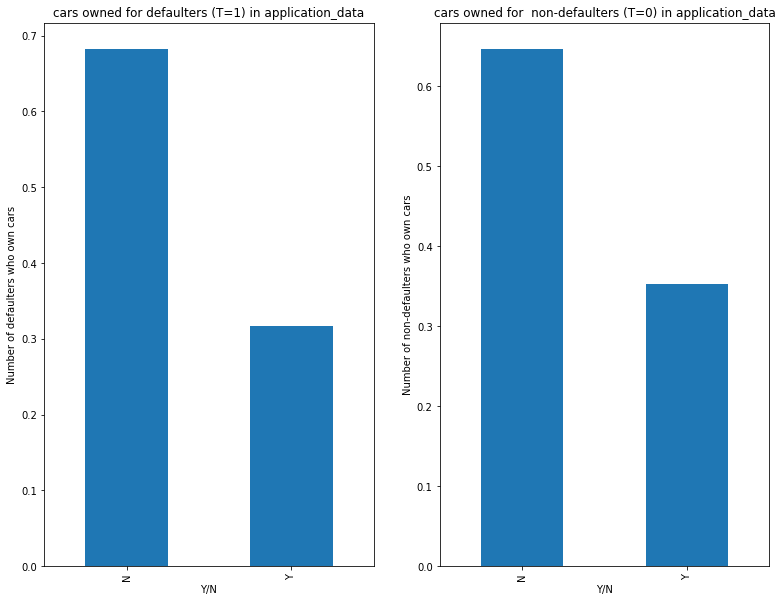

In [59]:
 
plt.figure(figsize=(13,10))
plt.subplot(121)
plt.title('cars owned for defaulters (T=1) in application_data')
plt.ylabel('Number of defaulters who own cars')
plt.xlabel('Y/N')
defaulter_application_data_dc["FLAG_OWN_CAR"].value_counts(normalize=True).plot.bar()
plt.subplot(122)
plt.title('cars owned for  non-defaulters (T=0) in application_data')
plt.ylabel('Number of non-defaulters who own cars')
plt.xlabel('Y/N')
non_defaulter_application_data_dc["FLAG_OWN_CAR"].value_counts(normalize=True).plot.bar()
plt.show()

### Conclusion - We cannot decide much using type of FLAG_OWN_CAR in identifying the defaulters, because in both the cases of defaulters and non-defaulters, the pattern followed is the same.

In [61]:
 non_defaulter_application_data_dc["FLAG_OWN_REALTY"].unique()


array(['Y', 'N'], dtype=object)

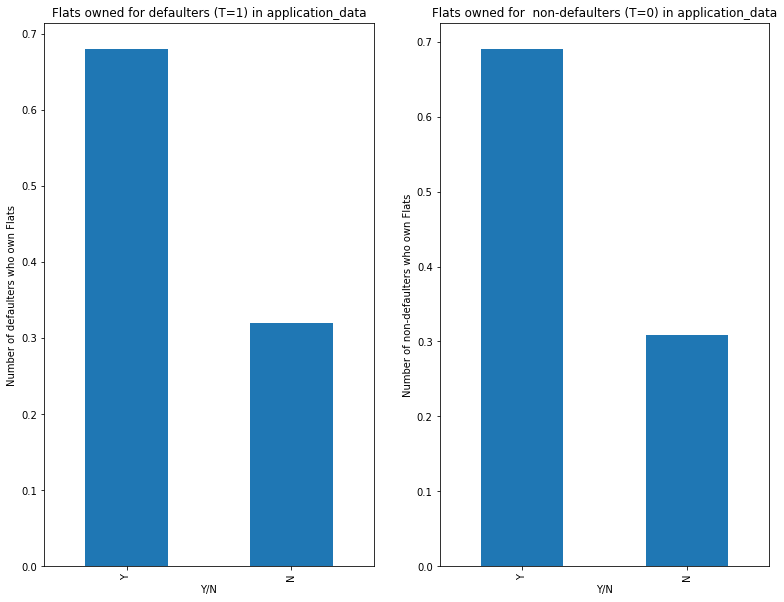

In [62]:
plt.figure(figsize=(13,10))
plt.subplot(121)
plt.title('Flats owned for defaulters (T=1) in application_data')
plt.ylabel('Number of defaulters who own Flats')
plt.xlabel('Y/N')
defaulter_application_data_dc["FLAG_OWN_REALTY"].value_counts(normalize=True).plot.bar()
plt.subplot(122)
plt.title('Flats owned for  non-defaulters (T=0) in application_data')
plt.ylabel('Number of non-defaulters who own Flats')
plt.xlabel('Y/N')
non_defaulter_application_data_dc["FLAG_OWN_REALTY"].value_counts(normalize=True).plot.bar()
plt.show()

### Conclusion: We cannot decide much using type of FLAG_OWN_REALTY in identifying the defaulters, because both in the case of defaulters and non-defaulters, the pattern followed is the same.

In [64]:

non_defaulter_application_data_dc["CNT_CHILDREN"].unique()

array([ 0,  1,  2,  3,  4,  7,  6,  5,  8, 12, 10, 14, 19])

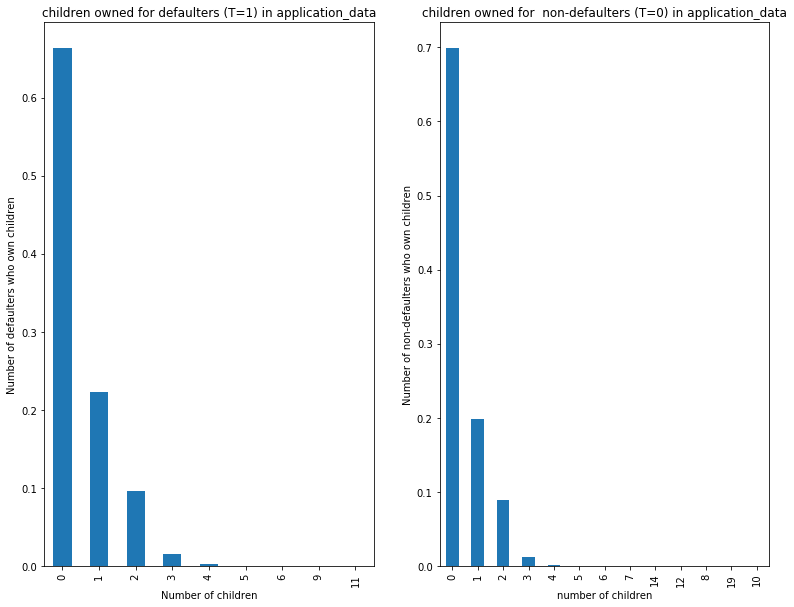

In [65]:
plt.figure(figsize=(13,10))
plt.subplot(121)
plt.title('children owned for defaulters (T=1) in application_data')
plt.ylabel('Number of defaulters who own children')
plt.xlabel('Number of children')
defaulter_application_data_dc["CNT_CHILDREN"].value_counts(normalize=True).plot.bar()
plt.subplot(122)
plt.title('children owned for  non-defaulters (T=0) in application_data')
plt.ylabel('Number of non-defaulters who own children')
plt.xlabel('number of children')
non_defaulter_application_data_dc["CNT_CHILDREN"].value_counts(normalize=True).plot.bar()
plt.show()

In [66]:
 
non_defaulter_application_data_dc["AMT_INCOME_TOTAL"].unique()

array([ 67500. ,  99000. , 171000. , ..., 949500. , 936000. , 113062.5])

In [67]:
defaulters_income_mean=defaulter_application_data_dc["AMT_INCOME_TOTAL"].mean()
non_defaulter_income_mean=non_defaulter_application_data_dc["AMT_INCOME_TOTAL"].mean()
print(defaulters_income_mean,non_defaulter_income_mean)

171287.51767200755 172103.74267501585


<BarContainer object of 2 artists>

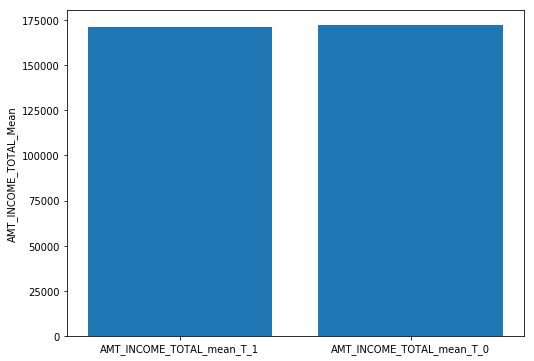

In [68]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.ylabel('AMT_INCOME_TOTAL_Mean')
x=['AMT_INCOME_TOTAL_mean_T_1','AMT_INCOME_TOTAL_mean_T_0']
y=[defaulters_income_mean,non_defaulter_income_mean]
plt.bar(x,y)

In [69]:
#income seems to be same when compared directly, let us compare based on gender income

defaulter_application_data_dc["CODE_GENDER"].unique()

array(['M', 'F'], dtype=object)

In [70]:
male_defaulters=defaulter_application_data_dc[defaulter_application_data_dc["CODE_GENDER"]=='M']
female_defaulters=defaulter_application_data_dc[defaulter_application_data_dc["CODE_GENDER"]=='F']
md_income_mean=male_defaulters["AMT_INCOME_TOTAL"].mean()
fd_income_mean=female_defaulters["AMT_INCOME_TOTAL"].mean()
print(md_income_mean,fd_income_mean)


male_ndefaulters=non_defaulter_application_data_dc[non_defaulter_application_data_dc["CODE_GENDER"]=='M']
female_ndefaulters=non_defaulter_application_data_dc[non_defaulter_application_data_dc["CODE_GENDER"]=='F']
mnd_income_mean=male_ndefaulters["AMT_INCOME_TOTAL"].mean()
fnd_income_mean=female_ndefaulters["AMT_INCOME_TOTAL"].mean()
print(mnd_income_mean,fnd_income_mean)


183714.35502625655 162333.47756756758
199256.12637055875 158814.24572808584


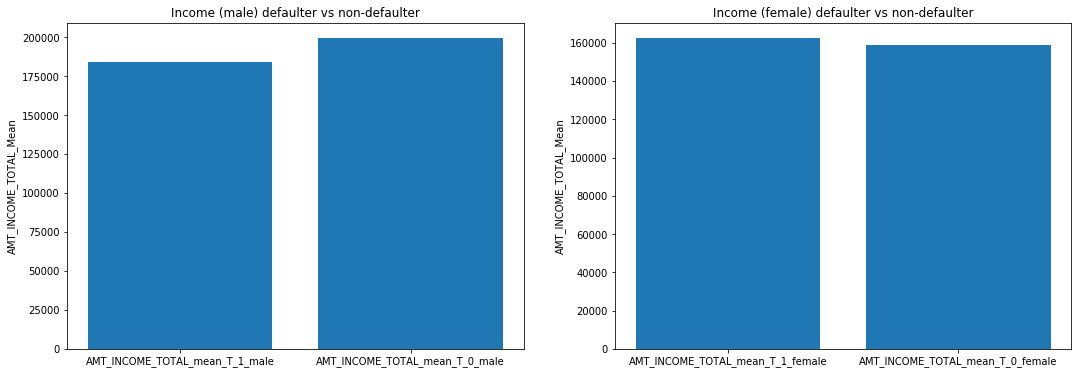

In [71]:
plt.figure(figsize=(18,6))
 
plt.subplot(121)
plt.title("Income (male) defaulter vs non-defaulter")
plt.ylabel('AMT_INCOME_TOTAL_Mean')
x=['AMT_INCOME_TOTAL_mean_T_1_male','AMT_INCOME_TOTAL_mean_T_0_male']
y=[md_income_mean,mnd_income_mean]
plt.bar(x,y)

 
plt.subplot(122)
plt.title("Income (female) defaulter vs non-defaulter")
plt.ylabel('AMT_INCOME_TOTAL_Mean')
x=['AMT_INCOME_TOTAL_mean_T_1_female','AMT_INCOME_TOTAL_mean_T_0_female']
y=[fd_income_mean,fnd_income_mean]
plt.bar(x,y)

plt.show()

### When we consider the income group based on male and female, we can observe that when the income is low in both male and female categories, defaulting chance is there and hence we should be careful. 

In [73]:

md_amcd_mean=male_defaulters["AMT_CREDIT"].mean()
fd_amcd_mean=female_defaulters["AMT_CREDIT"].mean()
print(md_income_mean,fd_income_mean)

 
mnd_amcd_mean=male_ndefaulters["AMT_CREDIT"].mean()
fnd_amcd_mean=female_ndefaulters["AMT_CREDIT"].mean()
print(mnd_amcd_mean,fnd_amcd_mean)

183714.35502625655 162333.47756756758
628913.298605893 603512.3083447162


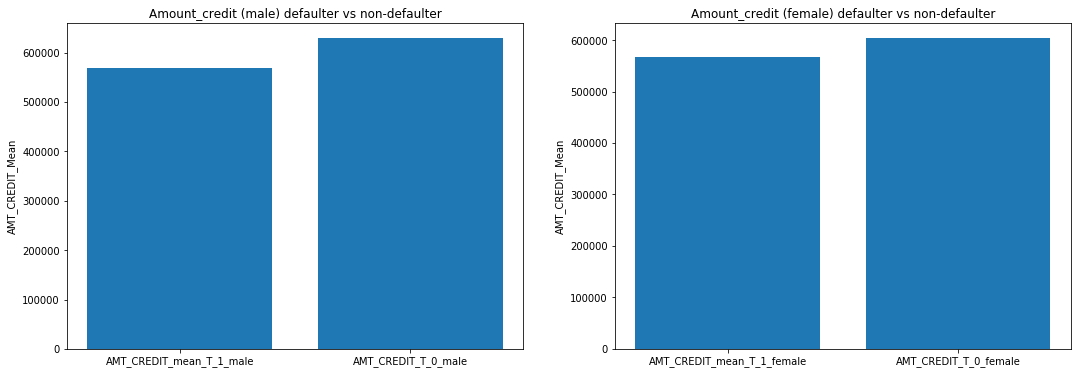

In [74]:
plt.figure(figsize=(18,6))
 
plt.subplot(121)
plt.title("Amount_credit (male) defaulter vs non-defaulter")
plt.ylabel('AMT_CREDIT_Mean')
x=['AMT_CREDIT_mean_T_1_male','AMT_CREDIT_T_0_male']
y=[md_amcd_mean,mnd_amcd_mean]
plt.bar(x,y)

 
plt.subplot(122)
plt.title("Amount_credit (female) defaulter vs non-defaulter")
plt.ylabel('AMT_CREDIT_Mean')
x=['AMT_CREDIT_mean_T_1_female','AMT_CREDIT_T_0_female']
y=[fd_amcd_mean,fnd_amcd_mean]
plt.bar(x,y)

plt.show()

### When we consider amount_credit grouped based on male and female, we can observe that when the amount_credit is low in both male and female categories, defaulting chance is there and we should be careful. 

In [76]:
 
defaulter_application_data_dc["NAME_INCOME_TYPE"].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant'],
      dtype=object)

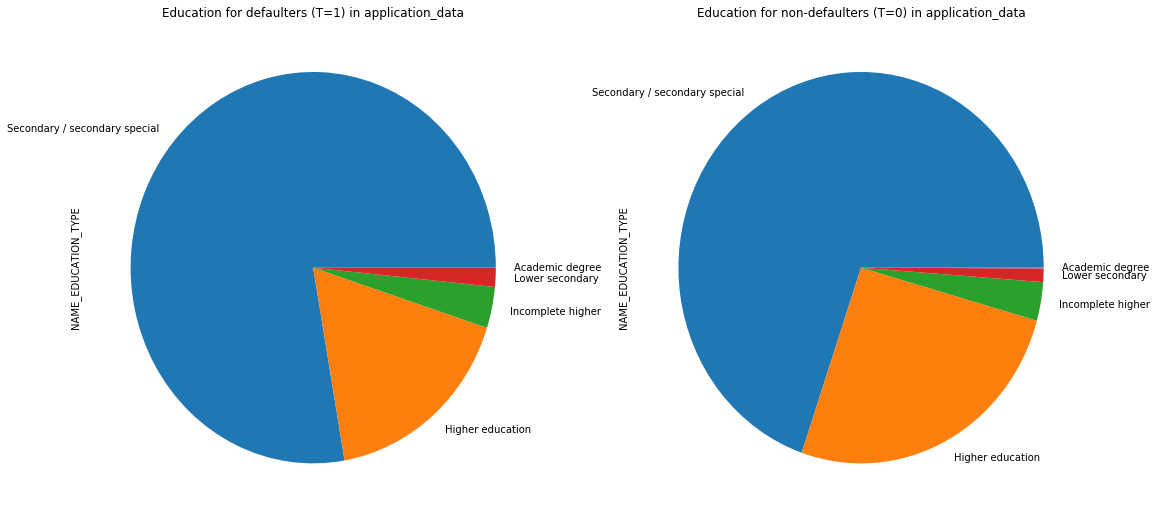

In [77]:
plt.figure(figsize=(18,9))
plt.subplot(121)
plt.title('Education for defaulters (T=1) in application_data')
 
defaulter_application_data_dc["NAME_EDUCATION_TYPE"].value_counts(normalize=True).plot.pie()
 
 
plt.subplot(122)
plt.title('Education for non-defaulters (T=0) in application_data')
non_defaulter_application_data_dc["NAME_EDUCATION_TYPE"].value_counts(normalize=True).plot.pie()
plt.show()

### Based on the education , we cannot find much insights as both the plots followed the same pattern. But we can observe that people with higher education usually pay loans back and are non-defaulters.

In [79]:

defaulter_application_data_dc["NAME_FAMILY_STATUS"].unique()

array(['Single / not married', 'Widow', 'Married', 'Civil marriage',
       'Separated'], dtype=object)

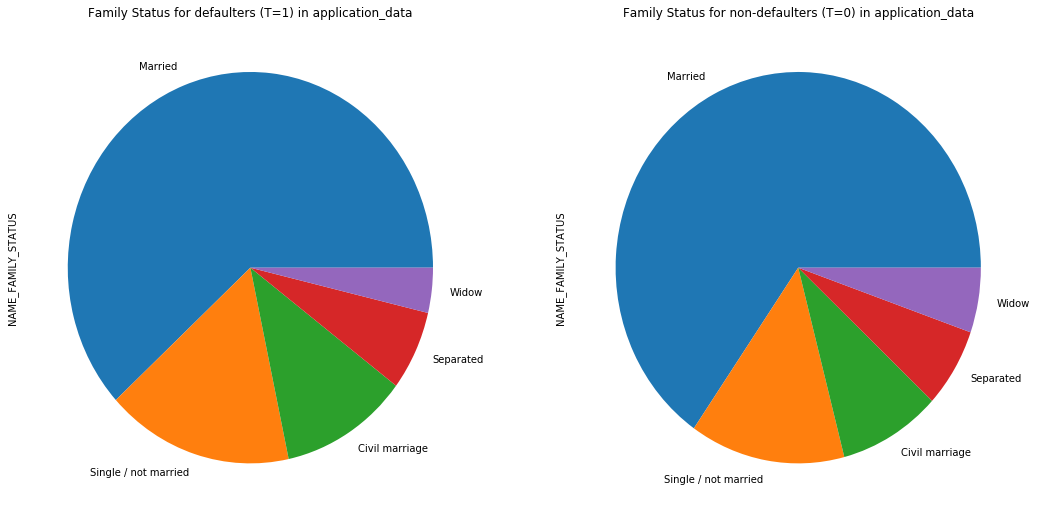

In [80]:
plt.figure(figsize=(18,9))
plt.subplot(121)
plt.title('Family Status for defaulters (T=1) in application_data')
 
defaulter_application_data_dc["NAME_FAMILY_STATUS"].value_counts(normalize=True).plot.pie()
 
 
plt.subplot(122)
plt.title('Family Status for non-defaulters (T=0) in application_data')
non_defaulter_application_data_dc["NAME_FAMILY_STATUS"].value_counts(normalize=True).plot.pie()
plt.show()

### We cannot conclude anything based on family status

In [82]:

md_de_mean=male_defaulters["DAYS_EMPLOYED"].mean()
fd_de_mean=female_defaulters['DAYS_EMPLOYED'].mean()
print(md_de_mean,fd_de_mean)

 
mnd_de_mean=male_ndefaulters["DAYS_EMPLOYED"].mean()
fnd_de_mean=female_ndefaulters["DAYS_EMPLOYED"].mean()
print(mnd_de_mean,fnd_de_mean)

22392.776069017254 56036.13864864865
33093.64776996565 81218.92000052537


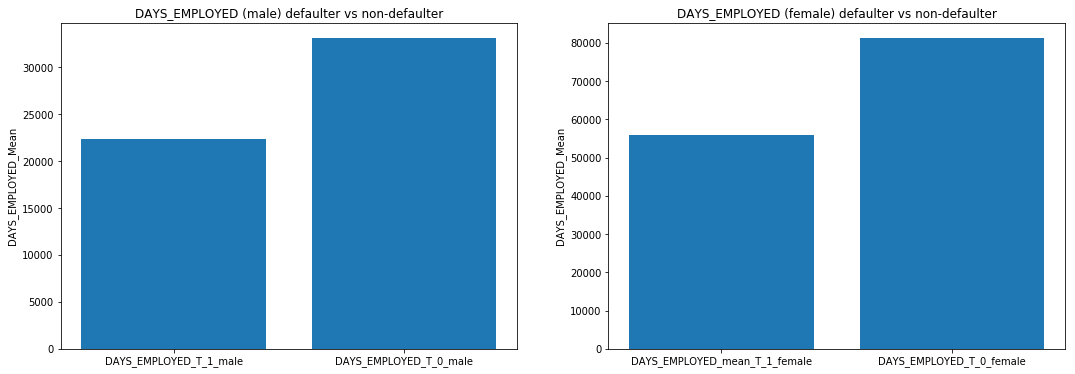

In [83]:
plt.figure(figsize=(18,6))
 
plt.subplot(121)
plt.title("DAYS_EMPLOYED (male) defaulter vs non-defaulter")
plt.ylabel('DAYS_EMPLOYED_Mean')
x=['DAYS_EMPLOYED_T_1_male','DAYS_EMPLOYED_T_0_male']
y=[md_de_mean,mnd_de_mean]
plt.bar(x,y)

 
plt.subplot(122)
plt.title("DAYS_EMPLOYED (female) defaulter vs non-defaulter")
plt.ylabel('DAYS_EMPLOYED_Mean')
x=['DAYS_EMPLOYED_mean_T_1_female','DAYS_EMPLOYED_T_0_female']
y=[fd_de_mean,fnd_de_mean]
plt.bar(x,y)

plt.show()

### The defaulters are high when they are employed for less number of days compared to the employees who are employed for more number of days in both the categories of male and female. 

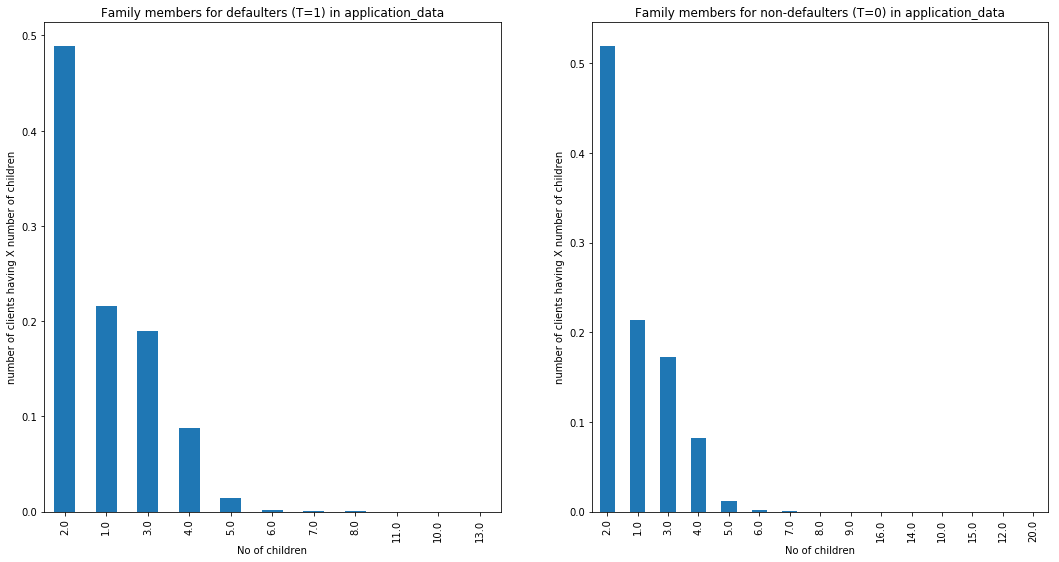

In [85]:
plt.figure(figsize=(18,9))
plt.subplot(121)
plt.title('Family members for defaulters (T=1) in application_data')
plt.xlabel("No of children")
plt.ylabel("number of clients having X number of children")
defaulter_application_data_dc["CNT_FAM_MEMBERS"].value_counts(normalize=True).plot.bar()
 
 
plt.subplot(122)
plt.title('Family members for non-defaulters (T=0) in application_data')
plt.xlabel("No of children")
plt.ylabel("number of clients having X number of children")

non_defaulter_application_data_dc["CNT_FAM_MEMBERS"].value_counts(normalize=True).plot.bar()
plt.show()



### We cannot conclude anything as both the graphs have similar patterns

In [87]:

md_es2_mean=male_defaulters["EXT_SOURCE_2"].mean()
fd_es2_mean=female_defaulters['EXT_SOURCE_2'].mean()
print(md_es2_mean,fd_es2_mean)

 
mnd_es2_mean=male_ndefaulters["EXT_SOURCE_2"].mean()
fnd_es2_mean=female_ndefaulters["EXT_SOURCE_2"].mean()
print(mnd_es2_mean,fnd_es2_mean)




d_es2_mean=defaulter_application_data_dc["EXT_SOURCE_2"].mean()
nd_es2_mean=non_defaulter_application_data_dc["EXT_SOURCE_2"].mean()
print(d_es2_mean,nd_es2_mean)

0.41473094972632946 0.4207139188204403
0.5268750576712072 0.5271333118292065
0.418208327302235 0.5270493963979292


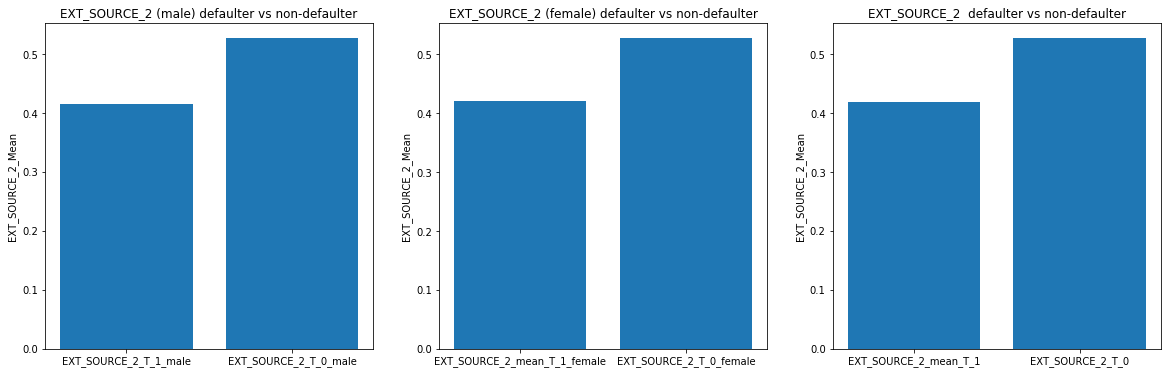

In [88]:
plt.figure(figsize=(20,6))
 
plt.subplot(131)
plt.title("EXT_SOURCE_2 (male) defaulter vs non-defaulter")
plt.ylabel('EXT_SOURCE_2_Mean')
x=['EXT_SOURCE_2_T_1_male','EXT_SOURCE_2_T_0_male']
y=[md_es2_mean,mnd_es2_mean]
plt.bar(x,y)

 
plt.subplot(132)
plt.title("EXT_SOURCE_2 (female) defaulter vs non-defaulter")
plt.ylabel('EXT_SOURCE_2_Mean')
x=['EXT_SOURCE_2_mean_T_1_female','EXT_SOURCE_2_T_0_female']
y=[fd_es2_mean,fnd_es2_mean]
plt.bar(x,y)


plt.subplot(133)
plt.title("EXT_SOURCE_2  defaulter vs non-defaulter")
plt.ylabel('EXT_SOURCE_2_Mean')
x=['EXT_SOURCE_2_mean_T_1','EXT_SOURCE_2_T_0']
y=[d_es2_mean,nd_es2_mean]
plt.bar(x,y)

plt.show()

### EXT_SOURCE_2 rating is high, being 0.5 or more for non defaulters considering both the genders

In [90]:

md_es3_mean=male_defaulters["EXT_SOURCE_3"].mean()
fd_es3_mean=female_defaulters['EXT_SOURCE_3'].mean()
print(md_es3_mean,fd_es3_mean)

 
mnd_es3_mean=male_ndefaulters["EXT_SOURCE_3"].mean()
fnd_es3_mean=female_ndefaulters["EXT_SOURCE_3"].mean()
print(mnd_es3_mean,fnd_es3_mean)

d_es3_mean=defaulter_application_data_dc["EXT_SOURCE_3"].mean()
nd_es3_mean=non_defaulter_application_data_dc["EXT_SOURCE_3"].mean()
print(d_es3_mean,nd_es3_mean)

0.396284794569323 0.38639922509890434
0.5161010530176882 0.5232943220040308
0.39053917612123445 0.5209267545874879


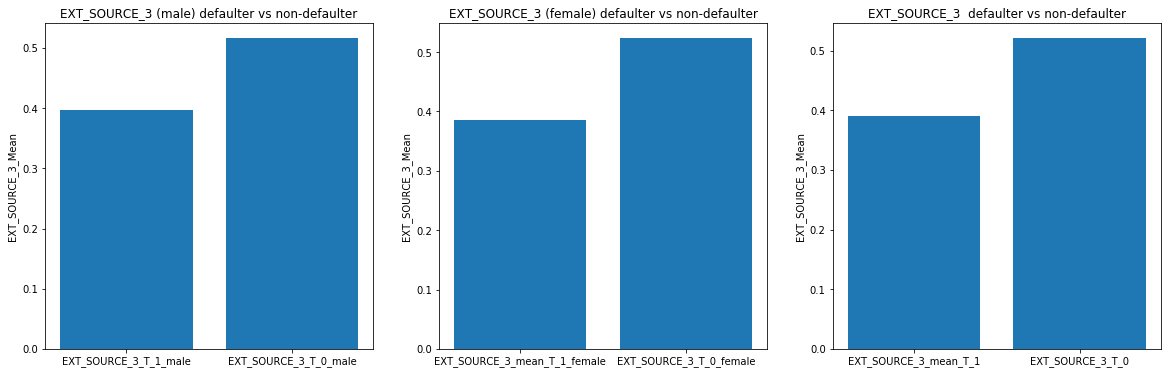

In [91]:
plt.figure(figsize=(20,6))
 
plt.subplot(131)
plt.title("EXT_SOURCE_3 (male) defaulter vs non-defaulter")
plt.ylabel('EXT_SOURCE_3_Mean')
x=['EXT_SOURCE_3_T_1_male','EXT_SOURCE_3_T_0_male']
y=[md_es3_mean,mnd_es3_mean]
plt.bar(x,y)

 
plt.subplot(132)
plt.title("EXT_SOURCE_3 (female) defaulter vs non-defaulter")
plt.ylabel('EXT_SOURCE_3_Mean')
x=['EXT_SOURCE_3_mean_T_1_female','EXT_SOURCE_3_T_0_female']
y=[fd_es3_mean,fnd_es3_mean]
plt.bar(x,y)

plt.subplot(133)
plt.title("EXT_SOURCE_3  defaulter vs non-defaulter")
plt.ylabel('EXT_SOURCE_3_Mean')
x=['EXT_SOURCE_3_mean_T_1','EXT_SOURCE_3_T_0']
y=[d_es3_mean,nd_es3_mean]
plt.bar(x,y)


plt.show()

### EXT_SOURCE_3 rating is high,being 0.5 or more for non defaulters considering both the genders

0.135388810235436 0.09731608931035703


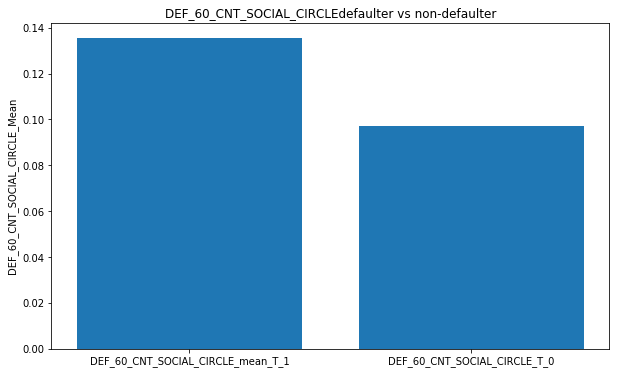

In [93]:

d_60d_mean=defaulter_application_data_dc["DEF_60_CNT_SOCIAL_CIRCLE"].mean()
nd_60d_mean=non_defaulter_application_data_dc["DEF_60_CNT_SOCIAL_CIRCLE"].mean()
print(d_60d_mean,nd_60d_mean)


plt.figure(figsize=(10,6))
plt.title("DEF_60_CNT_SOCIAL_CIRCLEdefaulter vs non-defaulter")
plt.ylabel('DEF_60_CNT_SOCIAL_CIRCLE_Mean')
x=['DEF_60_CNT_SOCIAL_CIRCLE_mean_T_1','DEF_60_CNT_SOCIAL_CIRCLE_T_0']
y=[d_60d_mean,nd_60d_mean]
plt.bar(x,y)


plt.show()

### DEF_60_CNT_SOCIAL_CIRCLE_mean  is below 0.1 for non-defaulters , so this metric can be looked closely before giving loans

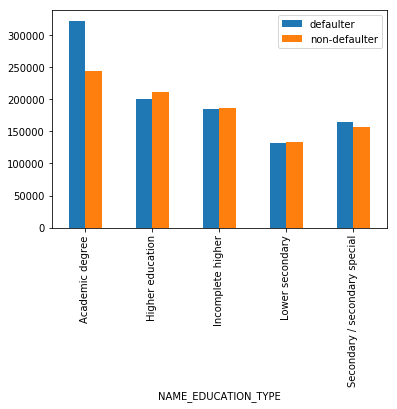

In [96]:
DEA=defaulter_application_data_dc.groupby("NAME_EDUCATION_TYPE")["AMT_INCOME_TOTAL"].mean()
NDEA=non_defaulter_application_data_dc.groupby("NAME_EDUCATION_TYPE")["AMT_INCOME_TOTAL"].mean()
index=NDEA.index
df = pd.DataFrame({'defaulter': DEA,
                   'non-defaulter': NDEA}, index=index)
df.plot.bar()
plt.show()

### This shows that though the people have academic degree and earn high, they are actually defaulters

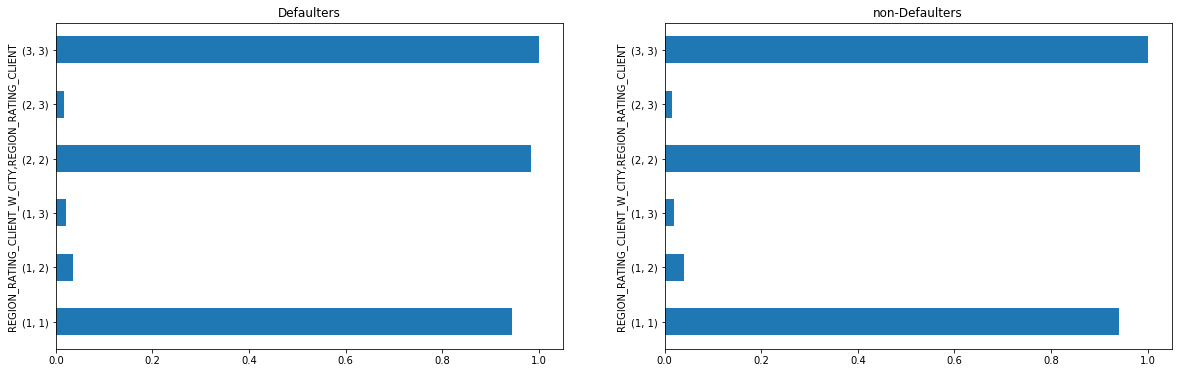

In [98]:
plt.figure(figsize=(20,6))

 
plt.subplot(121)
plt.title("Defaulters")
defaulter_application_data_dc.groupby("REGION_RATING_CLIENT_W_CITY")["REGION_RATING_CLIENT"].value_counts(normalize=True).plot.barh()
plt.subplot(122)
plt.title("non-Defaulters")
non_defaulter_application_data_dc.groupby("REGION_RATING_CLIENT_W_CITY")["REGION_RATING_CLIENT"].value_counts(normalize=True).plot.barh()

plt.show()

### This shows that in both defaulters and non-defaulters case,  REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT_W_CITY are having same rating

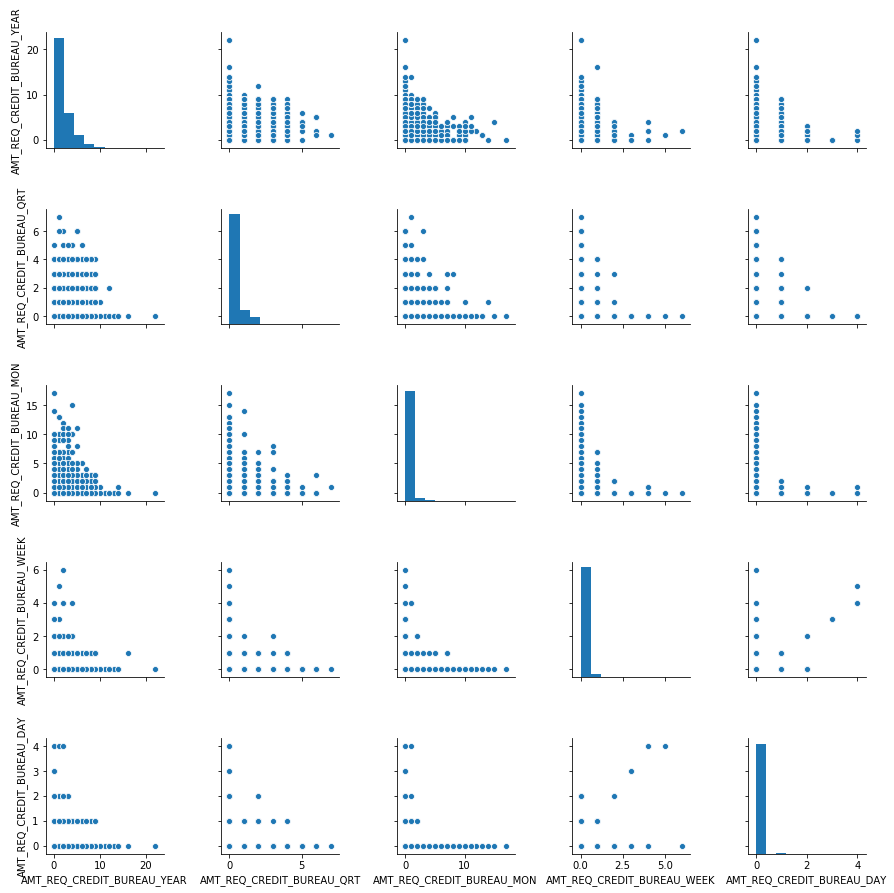

In [100]:
sns.pairplot(data=defaulter_application_data_dc,vars=["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON",
                                                     "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY"])
plt.show()

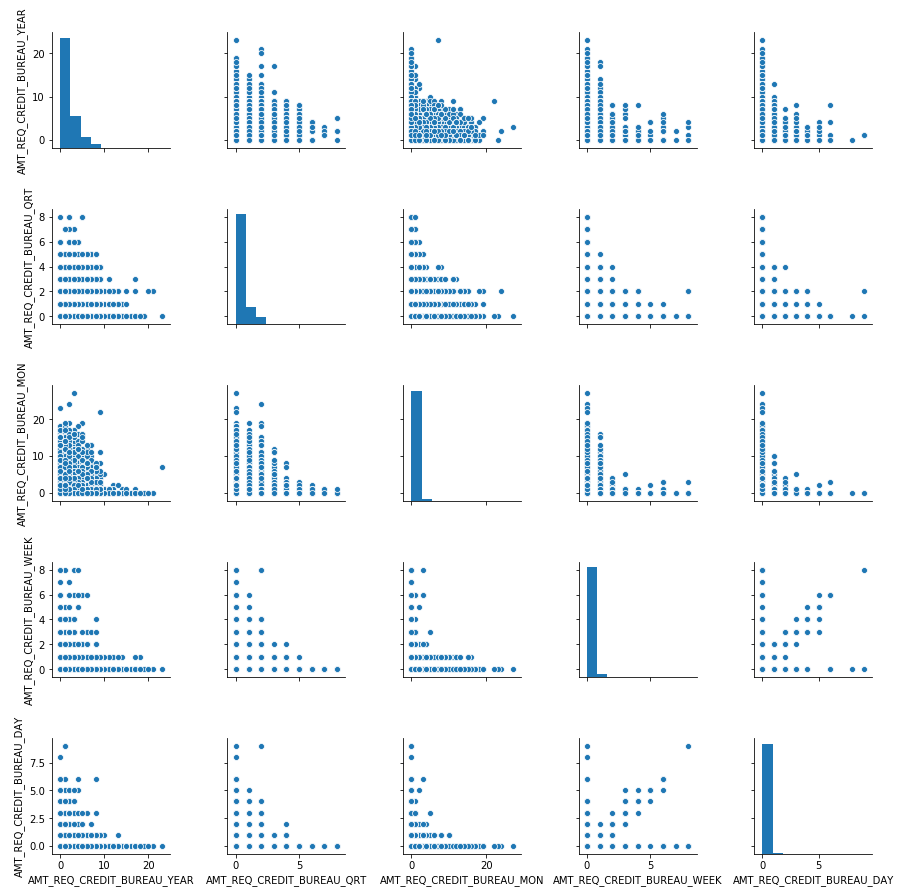

In [101]:
sns.pairplot(data=non_defaulter_application_data_dc,vars=["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON",
                                                     "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY"])
plt.show()

### In both defaulter and non-defaulter, the graphs followed same pattern so cannot get much out of AMT_REQ_CREDIT_BUREAU

In [103]:
defaulter_application_data_dc.groupby("NAME_CONTRACT_TYPE")["AMT_GOODS_PRICE"].mean()

NAME_CONTRACT_TYPE
Cash loans         513446.754955
Revolving loans    265507.582140
Name: AMT_GOODS_PRICE, dtype: float64

In [104]:
non_defaulter_application_data_dc.groupby("NAME_CONTRACT_TYPE")["AMT_GOODS_PRICE"].mean()

NAME_CONTRACT_TYPE
Cash loans         574337.532150
Revolving loans    326929.586293
Name: AMT_GOODS_PRICE, dtype: float64

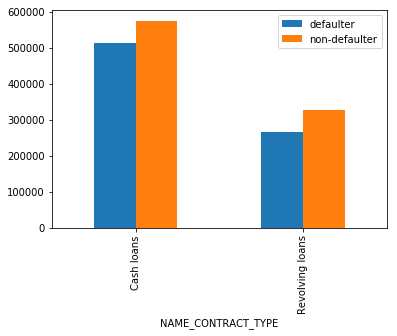

In [105]:
DNA=defaulter_application_data_dc.groupby("NAME_CONTRACT_TYPE")["AMT_GOODS_PRICE"].mean()
NDNA=non_defaulter_application_data_dc.groupby("NAME_CONTRACT_TYPE")["AMT_GOODS_PRICE"].mean()
index=NDNA.index
df = pd.DataFrame({'defaulter': DNA,
                   'non-defaulter': NDNA}, index=index)
df.plot.bar()
plt.show()

### In both the cash loans and revolving loans, mean is high for "AMT_GOODS_PRICE" incase of non-defaulters when compared to defaulters

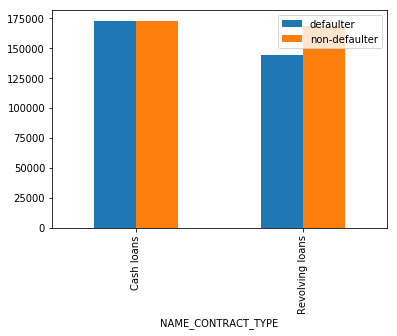

In [107]:
DNA=defaulter_application_data_dc.groupby("NAME_CONTRACT_TYPE")["AMT_INCOME_TOTAL"].mean()
NDNA=non_defaulter_application_data_dc.groupby("NAME_CONTRACT_TYPE")["AMT_INCOME_TOTAL"].mean()
index=NDNA.index
df = pd.DataFrame({'defaulter': DNA,
                   'non-defaulter': NDNA}, index=index)
df.plot.bar()
plt.show()

### No insight can be gained from Income along with contract type

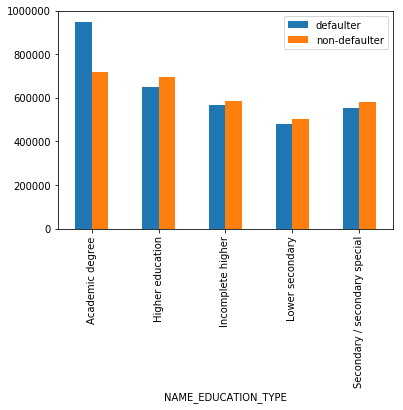

In [109]:
DEA=defaulter_application_data_dc.groupby("NAME_EDUCATION_TYPE")["AMT_CREDIT"].mean()
NDEA=non_defaulter_application_data_dc.groupby("NAME_EDUCATION_TYPE")["AMT_CREDIT"].mean()
index=NDEA.index
df = pd.DataFrame({'defaulter': DEA,
                   'non-defaulter': NDEA}, index=index)
df.plot.bar()
plt.show()

### AMT_CREDIT OF PEOPLE HAVING ACADEMIC DEGREE IS SIGNIFICANTLY AMONG THE DEFAULTERS

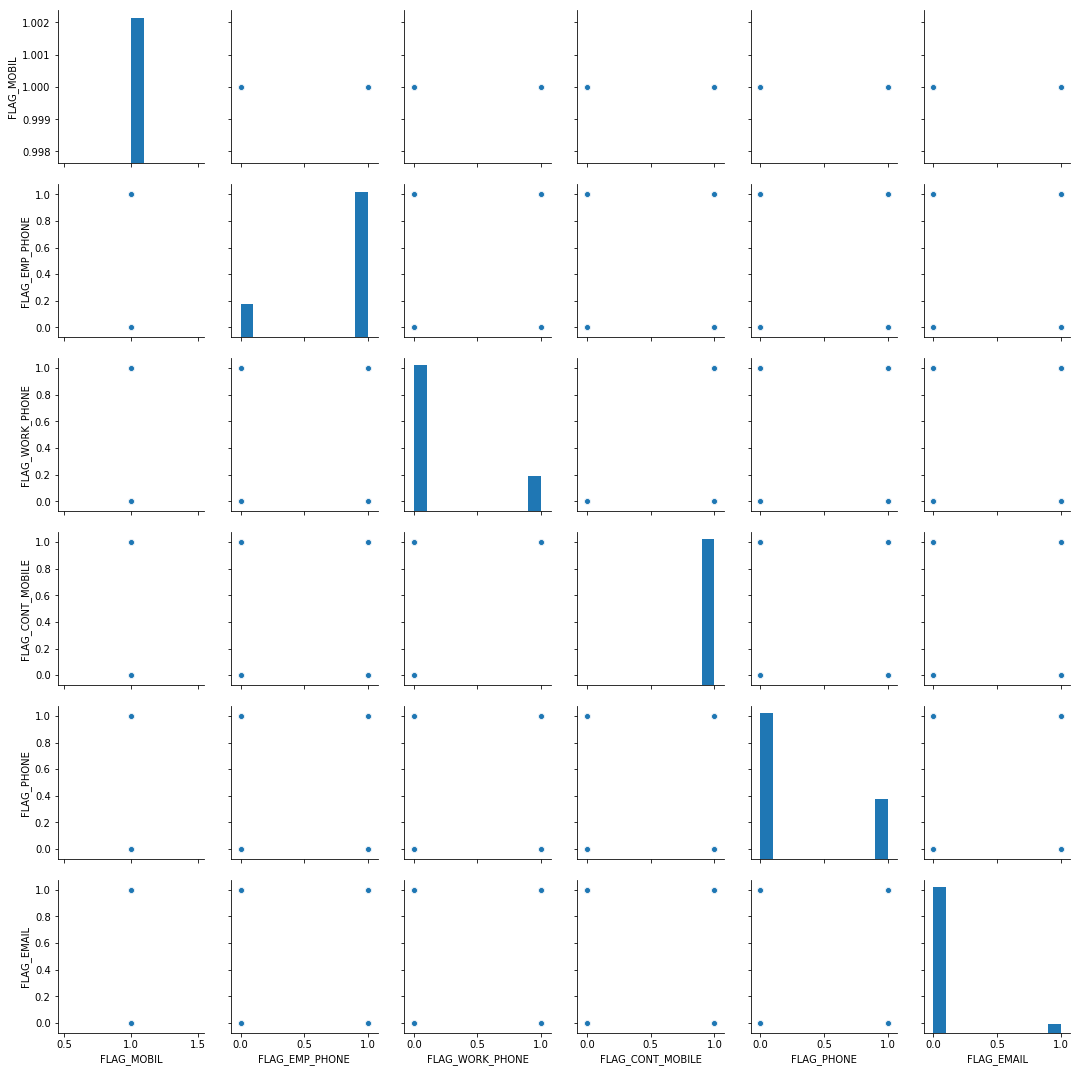

In [111]:
sns.pairplot(data=non_defaulter_application_data_dc,vars=["FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE"
                                                         ,"FLAG_PHONE","FLAG_EMAIL"])
plt.show()

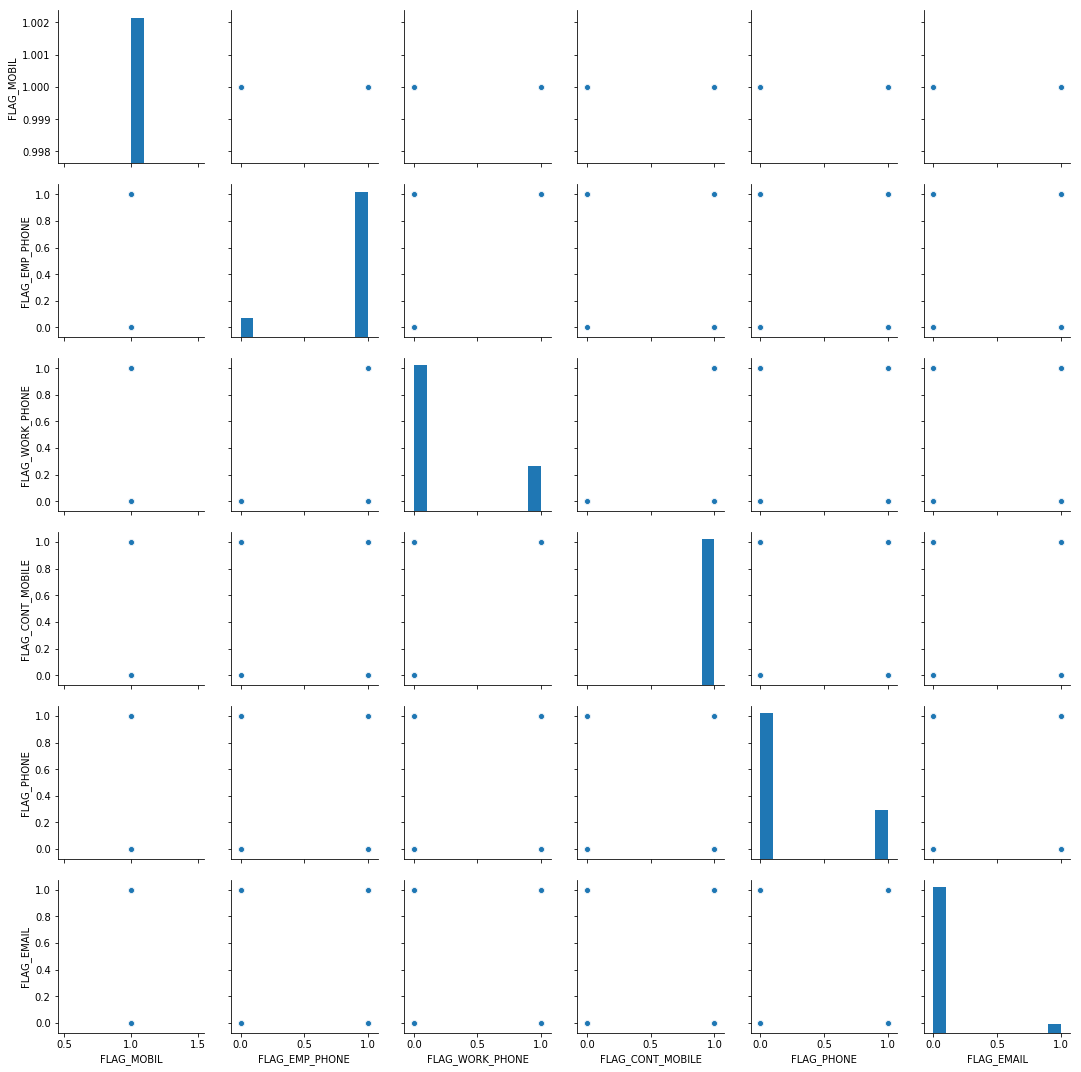

In [112]:
sns.pairplot(data=defaulter_application_data_dc,vars=["FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE"
                                                         ,"FLAG_PHONE","FLAG_EMAIL"])
plt.show()

### Almost both the defaulters and non-defaulters have similar kind of patterns regarding mobile phone , so no insights or conclusion can be drawn from the data of phone

In [266]:
previous_application_dc.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [267]:
previous_application_dc

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,...,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,...,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,...,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,...,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low


In [268]:
print(previous_application_dc["NAME_CONTRACT_TYPE"].unique())
previous_application_dc["NAME_CONTRACT_TYPE"].describe()

['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']


count        1670214
unique             4
top       Cash loans
freq          747553
Name: NAME_CONTRACT_TYPE, dtype: object

In [269]:
len(previous_application_dc[previous_application_dc["NAME_CONTRACT_TYPE"]=='XNA'])

346

In [270]:
# since only 346 rows have XNA and frequency off cash loans is very high , we can replace XNA with mode

previous_application_dc["NAME_CONTRACT_TYPE"=='XNA',"NAME_CONTRACT_TYPE"]=previous_application_dc["NAME_CONTRACT_TYPE"].mode()

In [271]:
print(previous_application_dc["NAME_CASH_LOAN_PURPOSE"].unique())
previous_application_dc["NAME_CASH_LOAN_PURPOSE"].describe()

['XAP' 'XNA' 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'Purchase of electronic equipment' 'Medicine' 'Payments on other loans'
 'Urgent needs' 'Buying a used car' 'Buying a new car'
 'Buying a holiday home / land' 'Education' 'Buying a home' 'Furniture'
 'Buying a garage' 'Business development' 'Wedding / gift / holiday'
 'Hobby' 'Gasification / water supply' 'Refusal to name the goal'
 'Money for a third person']


count     1670214
unique         25
top           XAP
freq       922661
Name: NAME_CASH_LOAN_PURPOSE, dtype: object

In [272]:
len(previous_application_dc[previous_application_dc["NAME_CASH_LOAN_PURPOSE"]=='XNA'])/len(previous_application_dc)

0.40588691030011725

In [273]:
#dropping this column is ideal because 40% of data for this column is not available

previous_application_dc.drop(["NAME_CASH_LOAN_PURPOSE"],axis=1,inplace=True)

In [274]:
len(previous_application_dc[previous_application_dc["NAME_PAYMENT_TYPE"]=='XNA'])/len(previous_application_dc)

0.37563090717716413

In [275]:
#dropping this column is ideal because 37.5% of data is not available for his column

previous_application_dc.drop(["NAME_PAYMENT_TYPE"],axis=1,inplace=True)

In [276]:
previous_application_dc['CODE_REJECT_REASON'].unique()
len(previous_application_dc[previous_application_dc['CODE_REJECT_REASON']=='XNA'])/len(previous_application_dc)

0.0031397174254317113

In [277]:
# It is good to replace XNA with mode for this column as there are very few XNA
previous_application_dc['CODE_REJECT_REASON'=='XNA','CODE_REJECT_REASON']=previous_application_dc['CODE_REJECT_REASON'].mode()

In [278]:
len(previous_application_dc[previous_application_dc['NAME_CLIENT_TYPE']=='XNA'])/len(previous_application_dc)

0.0011621265298937741

In [279]:
previous_application_dc['NAME_CLIENT_TYPE'].mode()

0    Repeater
dtype: object

In [280]:
# It is better to replace XNA with mode

previous_application_dc['NAME_CLIENT_TYPE'=='XNA','NAME_CLIENT_TYPE']=previous_application_dc['NAME_CLIENT_TYPE'].mode()

In [281]:
len(previous_application_dc[previous_application_dc['NAME_GOODS_CATEGORY']=='XNA'])/len(previous_application_dc)

0.5692737577340389

In [282]:
# dropping this column as 56% of data is not available
previous_application_dc.drop(['NAME_GOODS_CATEGORY'],axis=1,inplace=True)

In [283]:
# NAME_PORTFOLIO
len(previous_application_dc[previous_application_dc['NAME_PORTFOLIO']=='XNA'])/len(previous_application_dc)

0.22286365699245725

In [284]:
previous_application_dc["NAME_PORTFOLIO"].describe()


count     1670214
unique          5
top           POS
freq       691011
Name: NAME_PORTFOLIO, dtype: object

In [285]:
# It is ideal to remove all the rows with XNA inorder to analyse
previous_application_dc=previous_application_dc[previous_application_dc["NAME_PORTFOLIO"]!='XNA']

In [286]:
previous_application_dc["NAME_PORTFOLIO"].describe()

count     1297984
unique          4
top           POS
freq       691011
Name: NAME_PORTFOLIO, dtype: object

In [287]:

len(previous_application_dc[previous_application_dc['NAME_PRODUCT_TYPE']=='XNA'])/len(previous_application_dc)

0.53269994083132

In [288]:
# Ideal to remove this column as 50% of data is not available
previous_application_dc.drop(['NAME_PRODUCT_TYPE'],axis=1,inplace=True)

/home/sairajesh/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [289]:
 
len(previous_application_dc[previous_application_dc['NAME_SELLER_INDUSTRY']=='XNA'])/len(previous_application_dc)

0.4027707583452492

In [290]:
previous_application_dc['NAME_SELLER_INDUSTRY'].unique()

array(['Connectivity', 'XNA', 'Consumer electronics', 'Industry',
       'Clothing', 'Furniture', 'Construction', 'Jewelry',
       'Auto technology', 'MLM partners', 'Tourism'], dtype=object)

In [291]:
# Dropping this column is ideal as 40% of data has XNA
previous_application_dc.drop(['NAME_SELLER_INDUSTRY'],axis=1,inplace=True)

/home/sairajesh/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [292]:
 
len(previous_application_dc[previous_application_dc['NAME_YIELD_GROUP']=='XNA'])/len(previous_application_dc)

0.11170014422365761

In [293]:
# IDEAL to remove the rows which have XNA
previous_application_dc=previous_application_dc[previous_application_dc['NAME_YIELD_GROUP']!='XNA']

### WITH THIS XNA VALUES WHICH ARE MISSING VALUES ARE ADDRESSED

In [295]:

len(previous_application_dc[previous_application_dc[False, 'CODE_REJECT_REASON']=='XNA'])/len(previous_application_dc)

0.0

In [296]:
previous_application_dc.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                          0
AMT_APPLICATION                      0
AMT_CREDIT                           0
AMT_GOODS_PRICE                      0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
CODE_REJECT_REASON                   0
NAME_CLIENT_TYPE                     0
NAME_PORTFOLIO                       0
CHANNEL_TYPE                         0
SELLERPLACE_AREA                     0
CNT_PAYMENT                          0
NAME_YIELD_GROUP                     0
PRODUCT_COMBINATION                  0
(False, NAME_CONTRACT_TYPE)    1152998
(False, CODE_REJECT_REASON)    1152998
(False, NAME_CLIENT_TYPE)      1152998
dtype: int64

In [297]:
columns=previous_application_dc.isnull().sum().index
columns=columns[21:24]

In [298]:
previous_application_dc.drop(columns,axis=1,inplace=True)

In [299]:
previous_application_dc

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CONTRACT_STATUS,DAYS_DECISION,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Approved,-73,XAP,Repeater,POS,Country-wide,35,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Approved,-164,XAP,Repeater,Cash,Contact center,-1,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Approved,-301,XAP,Repeater,Cash,Credit and cash offices,-1,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Approved,-512,XAP,Repeater,Cash,Credit and cash offices,-1,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Refused,-781,HC,Repeater,Cash,Credit and cash offices,-1,24.0,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,...,Approved,-544,XAP,Refreshed,POS,Stone,43,30.0,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,...,Approved,-1694,XAP,New,POS,Stone,43,12.0,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,...,Approved,-1488,XAP,Repeater,POS,Country-wide,1370,10.0,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,...,Approved,-1185,XAP,Repeater,Cash,AP+ (Cash loan),-1,12.0,low_normal,Cash X-Sell: low


In [307]:
previous_application_dc.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'Target'],
      dtype='object')

### We are going classify the status 'Refused' as 1 and 'Approved' as 0. The reason for this assumption is that if the previous company rejects the loan for a person then the only reason for doing so is that the company would have sensed that the person might be having payment difficulties. In other hand, if the previous company approved the loan for a person then the only reason would be that the company would have sensed that the person whould not have any payment difficulties.


In [301]:

Prev_target=[]
for i in previous_application_dc['NAME_CONTRACT_STATUS'].tolist():
    if i == 'Approved':
        Prev_target.append(0)
    elif i == 'Refused':
        Prev_target.append(1)
    else:
        Prev_target.append(None)
        
previous_application_dc['Target'] = Prev_target 

In [302]:
previous_application_dc.shape

(1152999, 22)

In [304]:
d_prev=previous_application_dc[previous_application_dc["Target"]==1]

In [305]:
nd_prev=previous_application_dc[previous_application_dc["Target"]==0]

### Defaulter data in d_prev and non-defaulter in nd_prev

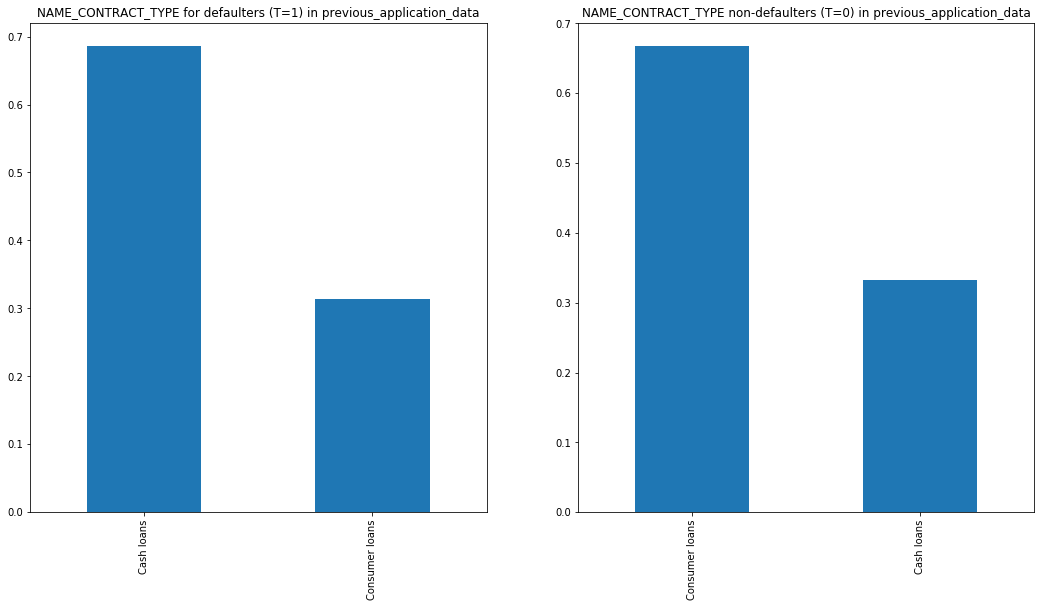

In [315]:
plt.figure(figsize=(18,9))
plt.subplot(121)
plt.title('NAME_CONTRACT_TYPE for defaulters (T=1) in previous_application_data')
 
d_prev["NAME_CONTRACT_TYPE"].value_counts(normalize=True).plot.bar()
 
 
plt.subplot(122)
plt.title('NAME_CONTRACT_TYPE non-defaulters (T=0) in previous_application_data')
nd_prev["NAME_CONTRACT_TYPE"].value_counts(normalize=True).plot.bar()
plt.show()

#its a clearn conclusio that most of the non_defaulters/loans rejected when they apply for cash loans in all the previous applications

#we can use this variable while givin the loans for present applications 


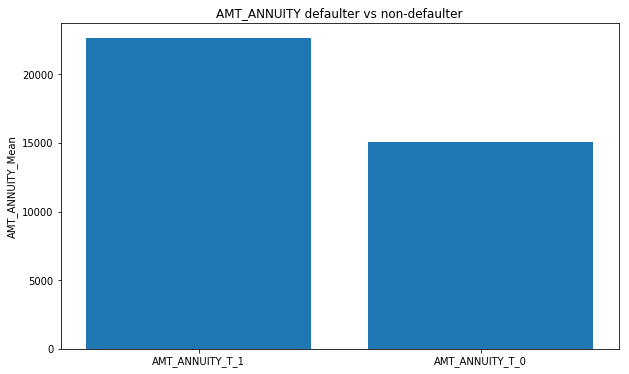

In [320]:

dpan=d_prev["AMT_ANNUITY"].mean()
ndpan=nd_prev["AMT_ANNUITY"].mean()

plt.figure(figsize=(10,6))
plt.title("AMT_ANNUITY defaulter vs non-defaulter")
plt.ylabel('AMT_ANNUITY_Mean')
x=['AMT_ANNUITY_T_1','AMT_ANNUITY_T_0']
y=[dpan,ndpan]
plt.bar(x,y)


plt.show()


#There is a clear significant difference in means for AMT_ANNUITY between defaulter and non-defaulter
#while giving loans to the present applicants make sure you consider this variable for decision to approve the loan

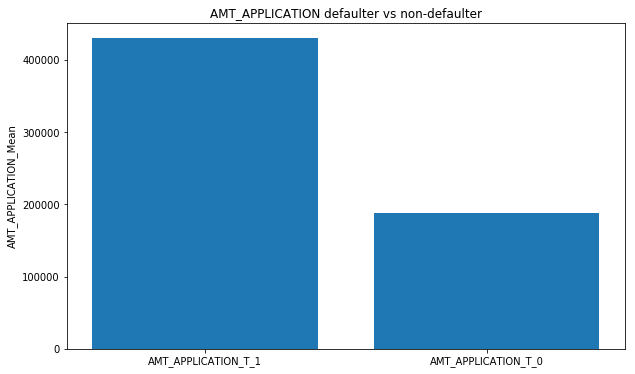

In [324]:
dpan=d_prev['AMT_APPLICATION'].mean()
ndpan=nd_prev['AMT_APPLICATION'].mean()

plt.figure(figsize=(10,6))
plt.title("AMT_APPLICATION defaulter vs non-defaulter")
plt.ylabel('AMT_APPLICATION_Mean')
x=['AMT_APPLICATION_T_1','AMT_APPLICATION_T_0']
y=[dpan,ndpan]
plt.bar(x,y)
plt.show()



#There is a clear significant difference in means for AMT_APPLICATION between defaulter and non-defaulter
#while giving loans to the present applicants make sure you consider this variable for decision to approve the loan


188023.5992690272

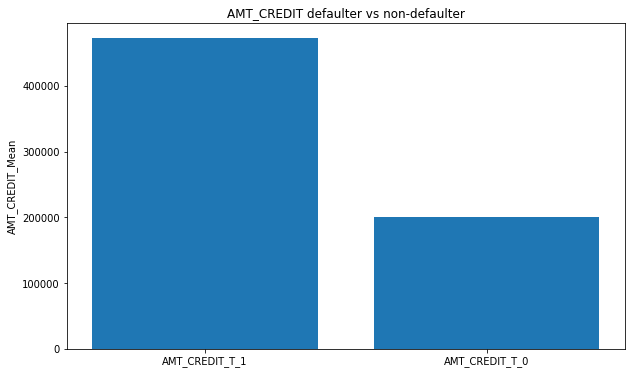

In [326]:
dpan=d_prev['AMT_CREDIT'].mean()
ndpan=nd_prev['AMT_CREDIT'].mean()

plt.figure(figsize=(10,6))
plt.title("AMT_CREDIT defaulter vs non-defaulter")
plt.ylabel('AMT_CREDIT_Mean')
x=['AMT_CREDIT_T_1','AMT_CREDIT_T_0']
y=[dpan,ndpan]
plt.bar(x,y)
plt.show()


#There is a clear significant difference in means for AMT_CREDIT between defaulter and non-defaulter
#while giving loans to the present applicants make sure you consider this variable for decision to approve the loan



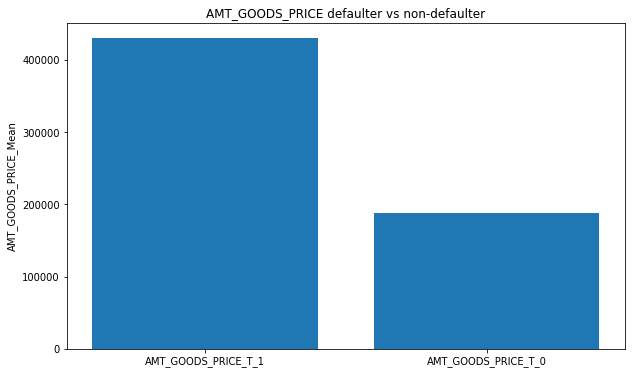

In [328]:

dpan=d_prev['AMT_GOODS_PRICE'].mean()
ndpan=nd_prev['AMT_GOODS_PRICE'].mean()

plt.figure(figsize=(10,6))
plt.title("AMT_GOODS_PRICE defaulter vs non-defaulter")
plt.ylabel('AMT_GOODS_PRICE_Mean')
x=['AMT_GOODS_PRICE_T_1','AMT_GOODS_PRICE_T_0']
y=[dpan,ndpan]
plt.bar(x,y)
plt.show()


#There is a clear significant difference in means for AMT_GOODS_PRICE between defaulter and non-defaulter
#while giving loans to the present applicants make sure you consider this variable for decision to approve the loan

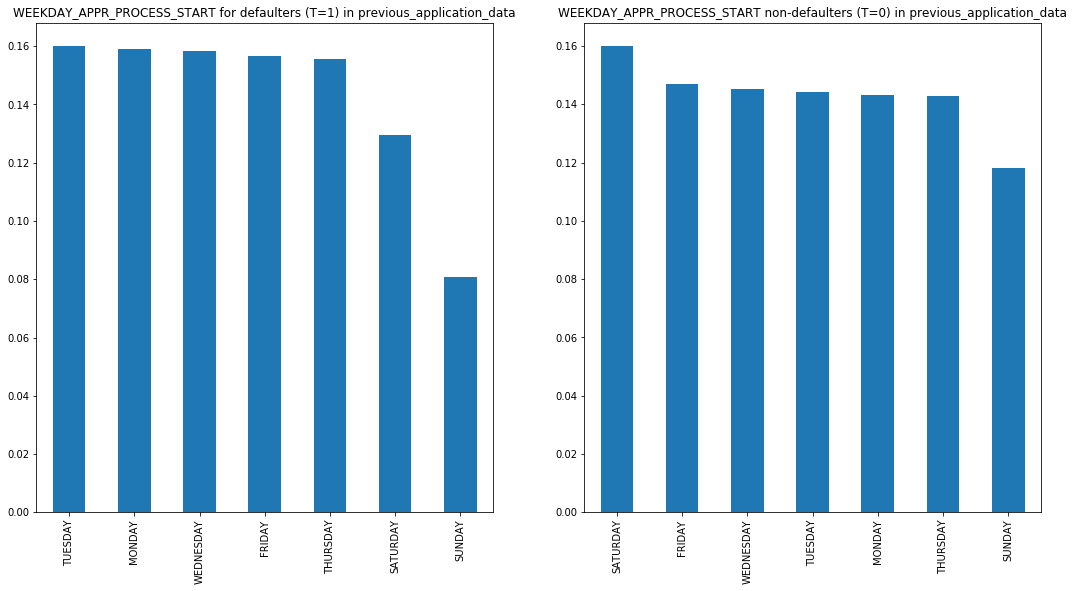

In [329]:
'WEEKDAY_APPR_PROCESS_START'

plt.figure(figsize=(18,9))
plt.subplot(121)
plt.title('WEEKDAY_APPR_PROCESS_START for defaulters (T=1) in previous_application_data')
 
d_prev["WEEKDAY_APPR_PROCESS_START"].value_counts(normalize=True).plot.bar()
 
 
plt.subplot(122)
plt.title('WEEKDAY_APPR_PROCESS_START non-defaulters (T=0) in previous_application_data')
nd_prev["WEEKDAY_APPR_PROCESS_START"].value_counts(normalize=True).plot.bar()
plt.show()
#Most of the non-defaulters apply loans during saturday and sunday(weekends) whereas for defaulters they usually apply during 
#week days

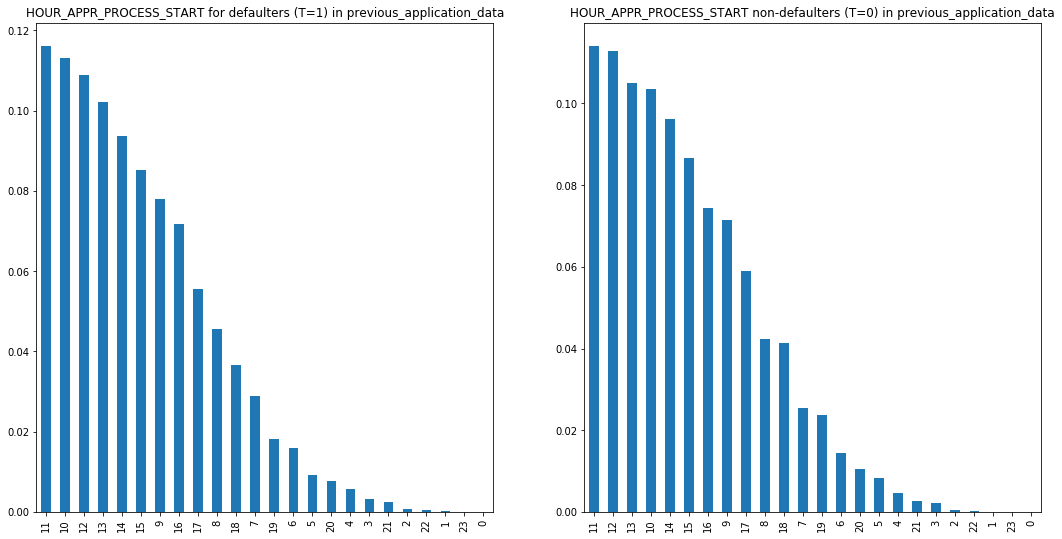

In [332]:
 
plt.figure(figsize=(18,9))
plt.subplot(121)
plt.title('HOUR_APPR_PROCESS_START for defaulters (T=1) in previous_application_data')
 
d_prev["HOUR_APPR_PROCESS_START"].value_counts(normalize=True).plot.bar()
 
 
plt.subplot(122)
plt.title('HOUR_APPR_PROCESS_START non-defaulters (T=0) in previous_application_data')
nd_prev["HOUR_APPR_PROCESS_START"].value_counts(normalize=True).plot.bar()
plt.show()

#There is no much insights you can gain based on hour at which application process started

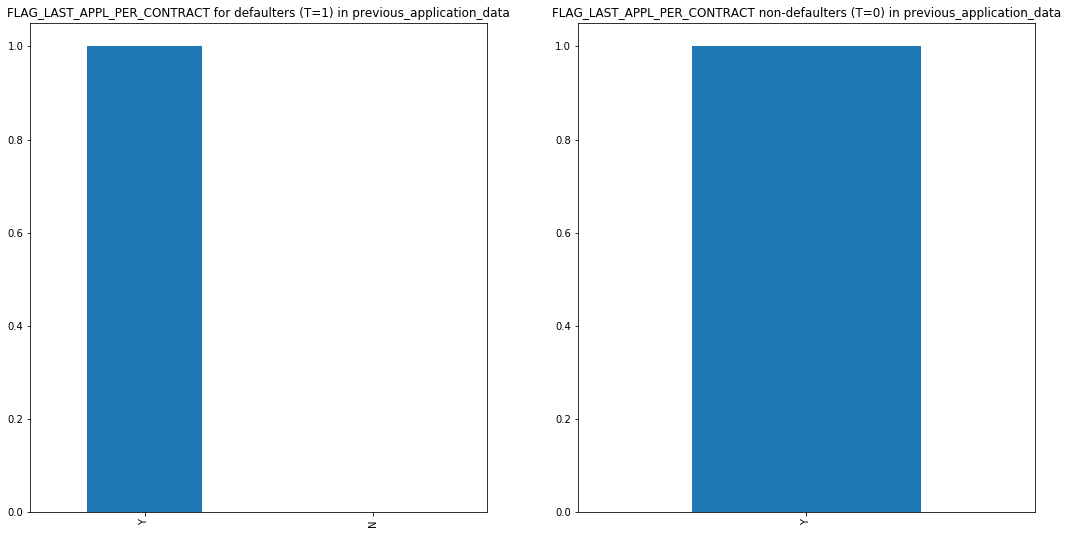

In [335]:


plt.figure(figsize=(18,9))
plt.subplot(121)
plt.title('FLAG_LAST_APPL_PER_CONTRACT for defaulters (T=1) in previous_application_data')
 
d_prev["FLAG_LAST_APPL_PER_CONTRACT"].value_counts(normalize=True).plot.bar()
 
 
plt.subplot(122)
plt.title('FLAG_LAST_APPL_PER_CONTRACT non-defaulters (T=0) in previous_application_data')
nd_prev["FLAG_LAST_APPL_PER_CONTRACT"].value_counts(normalize=True).plot.bar()
plt.show()


#There is no much insights you can gain based on FLAG_LAST_APPL_PER_CONTRACT

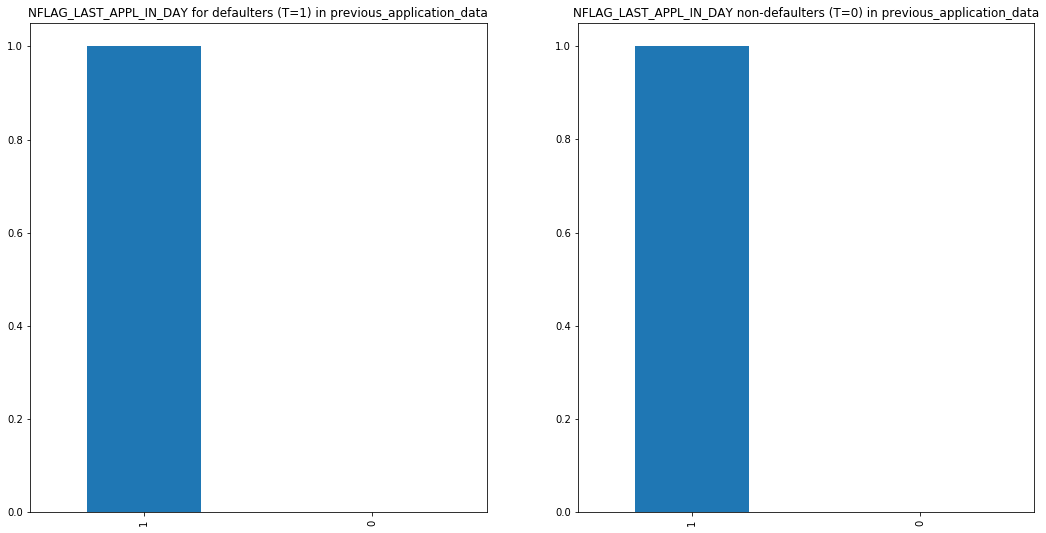

In [338]:

plt.figure(figsize=(18,9))
plt.subplot(121)
plt.title('NFLAG_LAST_APPL_IN_DAY for defaulters (T=1) in previous_application_data')
 
d_prev["NFLAG_LAST_APPL_IN_DAY"].value_counts(normalize=True).plot.bar()
 
 
plt.subplot(122)
plt.title('NFLAG_LAST_APPL_IN_DAY non-defaulters (T=0) in previous_application_data')
nd_prev["NFLAG_LAST_APPL_IN_DAY"].value_counts(normalize=True).plot.bar()
plt.show()

#No insights

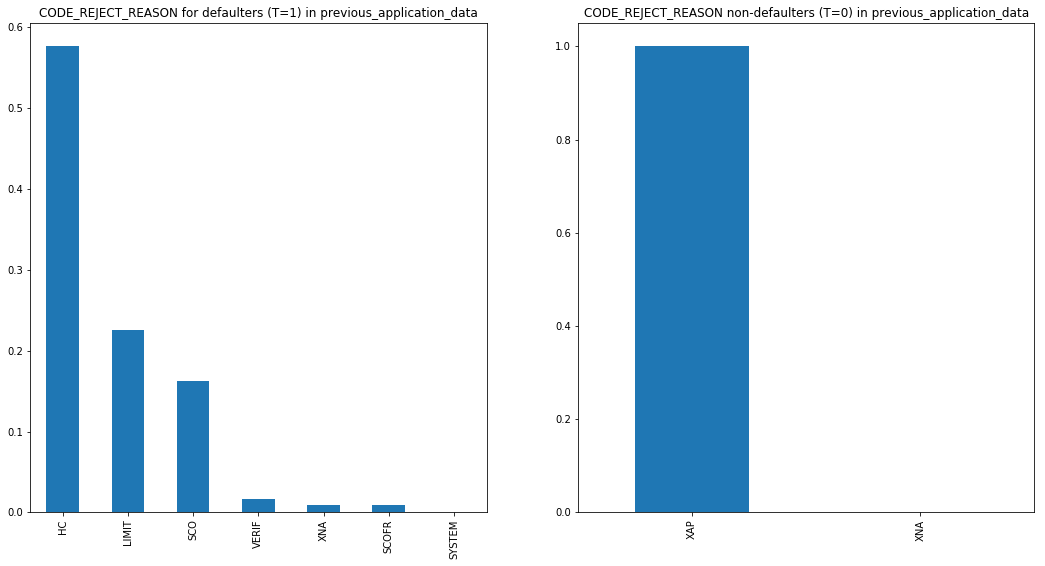

In [340]:
 



plt.figure(figsize=(18,9))
plt.subplot(121)
plt.title('CODE_REJECT_REASON for defaulters (T=1) in previous_application_data')
 
d_prev["CODE_REJECT_REASON"].value_counts(normalize=True).plot.bar()
 
 
plt.subplot(122)
plt.title('CODE_REJECT_REASON non-defaulters (T=0) in previous_application_data')
nd_prev["CODE_REJECT_REASON"].value_counts(normalize=True).plot.bar()
plt.show()

#if the previous application is rejected due to XAP most probably the present application is accepted other than that the
#application is rejected

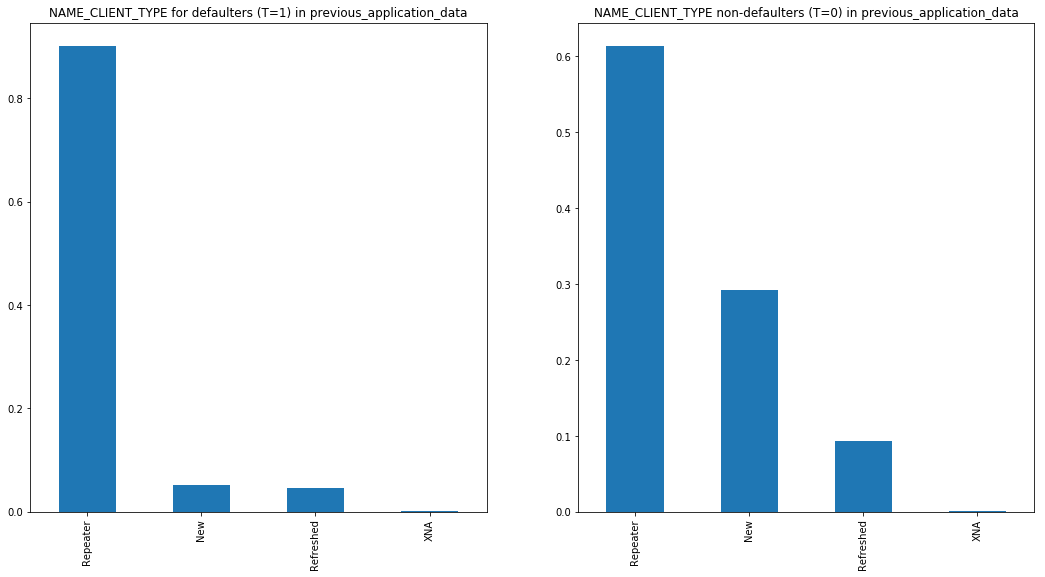

In [341]:
plt.figure(figsize=(18,9))
plt.subplot(121)
plt.title('NAME_CLIENT_TYPE for defaulters (T=1) in previous_application_data')
 
d_prev["NAME_CLIENT_TYPE"].value_counts(normalize=True).plot.bar()
 
 
plt.subplot(122)
plt.title('NAME_CLIENT_TYPE non-defaulters (T=0) in previous_application_data')
nd_prev["NAME_CLIENT_TYPE"].value_counts(normalize=True).plot.bar()
plt.show()


#if a clent is repeater you need to look into various factors but if he is a new applicant and the base factors are satisfied
#chance of client being defaulter is less.

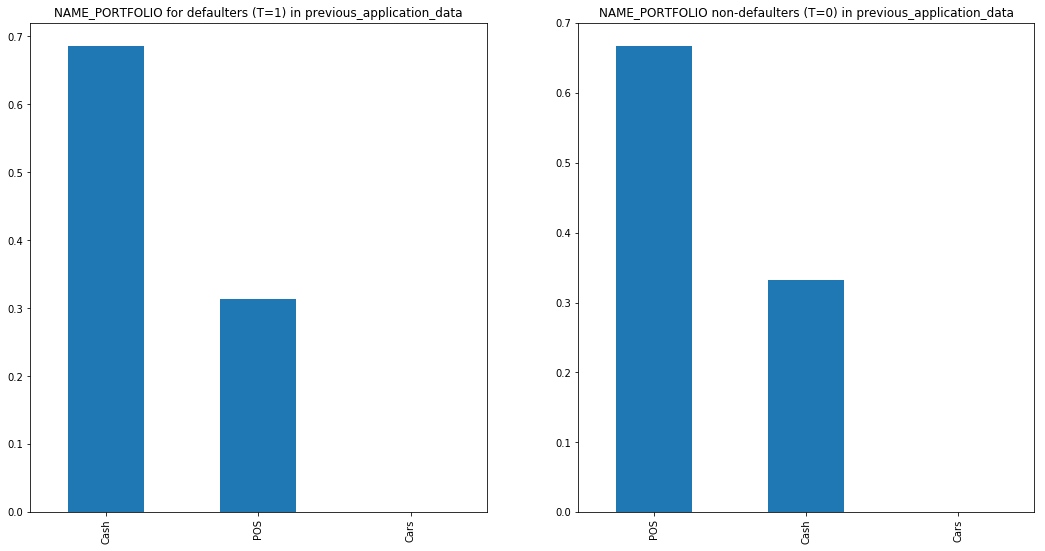

In [343]:
plt.figure(figsize=(18,9))
plt.subplot(121)
plt.title('NAME_PORTFOLIO for defaulters (T=1) in previous_application_data')
 
d_prev["NAME_PORTFOLIO"].value_counts(normalize=True).plot.bar()
 
 
plt.subplot(122)
plt.title('NAME_PORTFOLIO non-defaulters (T=0) in previous_application_data')
nd_prev["NAME_PORTFOLIO"].value_counts(normalize=True).plot.bar()
plt.show()

# if NAME_PORTFOLIO is POS the chance of client being defaulter is less compared to cash

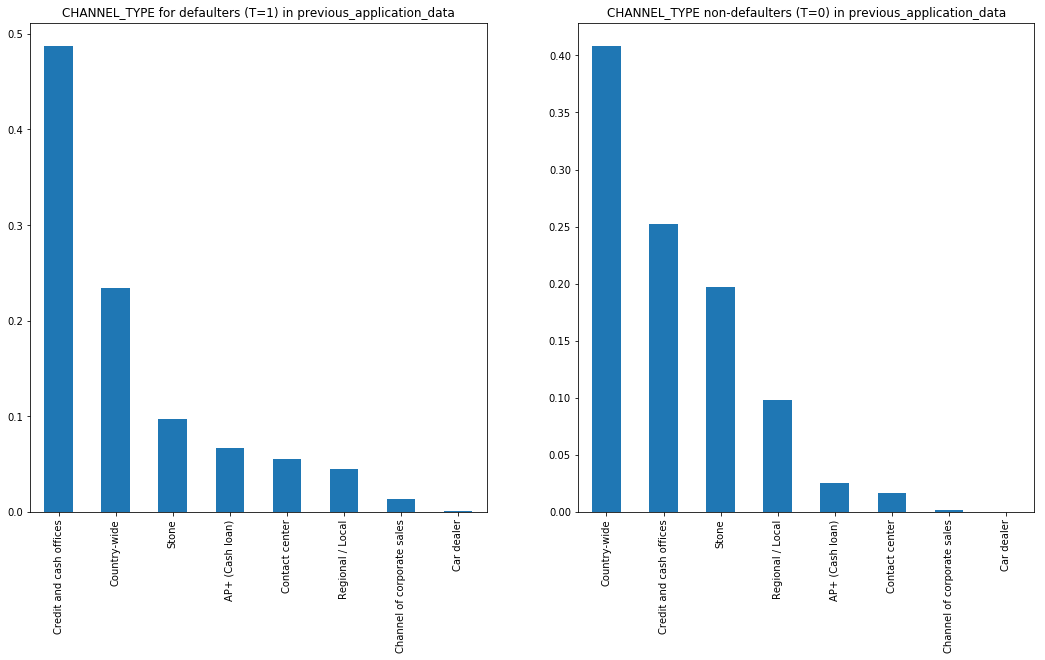

In [344]:
plt.figure(figsize=(18,9))
plt.subplot(121)
plt.title('CHANNEL_TYPE for defaulters (T=1) in previous_application_data')
 
d_prev["CHANNEL_TYPE"].value_counts(normalize=True).plot.bar()
 
 
plt.subplot(122)
plt.title('CHANNEL_TYPE non-defaulters (T=0) in previous_application_data')
nd_prev["CHANNEL_TYPE"].value_counts(normalize=True).plot.bar()
plt.show()

#not much insights

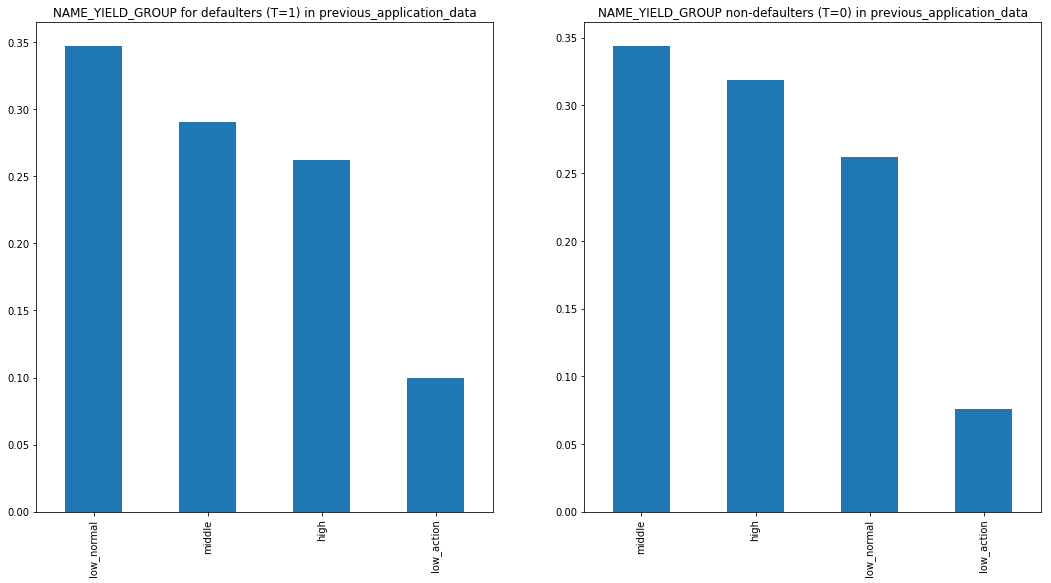

In [347]:
plt.figure(figsize=(18,9))
plt.subplot(121)
plt.title('NAME_YIELD_GROUP for defaulters (T=1) in previous_application_data')
 
d_prev["NAME_YIELD_GROUP"].value_counts(normalize=True).plot.bar()
 
 
plt.subplot(122)
plt.title('NAME_YIELD_GROUP non-defaulters (T=0) in previous_application_data')
nd_prev["NAME_YIELD_GROUP"].value_counts(normalize=True).plot.bar()
plt.show()

#not much insights

In [348]:
d_prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'Target'],
      dtype='object')

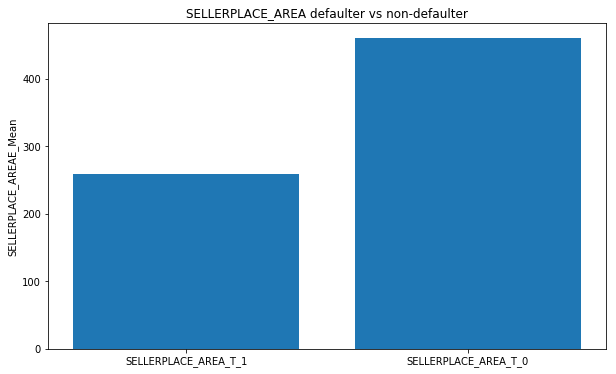

In [349]:
dpan=d_prev['SELLERPLACE_AREA'].mean()
ndpan=nd_prev['SELLERPLACE_AREA'].mean()

plt.figure(figsize=(10,6))
plt.title("SELLERPLACE_AREA defaulter vs non-defaulter")
plt.ylabel('SELLERPLACE_AREAE_Mean')
x=['SELLERPLACE_AREA_T_1','SELLERPLACE_AREA_T_0']
y=[dpan,ndpan]
plt.bar(x,y)
plt.show()

#if selling area is more the chance of client defaulting is less


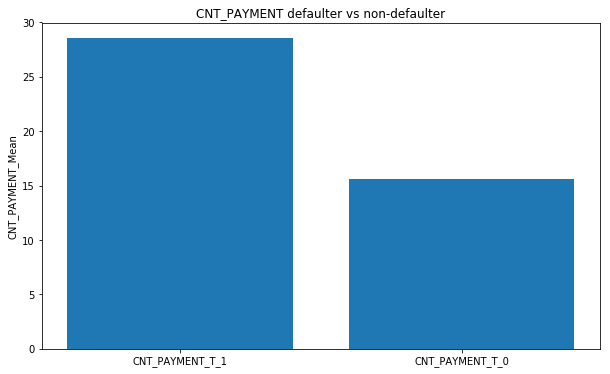

In [350]:
dpan=d_prev['CNT_PAYMENT'].mean()
ndpan=nd_prev['CNT_PAYMENT'].mean()

plt.figure(figsize=(10,6))
plt.title("CNT_PAYMENT defaulter vs non-defaulter")
plt.ylabel('CNT_PAYMENT_Mean')
x=['CNT_PAYMENT_T_1','CNT_PAYMENT_T_0']
y=[dpan,ndpan]
plt.bar(x,y)
plt.show()


# if the term of client's previous application is less then the chance of present application getting defaulted is less